SC1015 Mini Project - *Prediction of Resale Flat Prices* <br><br>
Team Members: Low Kar Choon, Law Wei Lu, Lim Zhi Yong

## <span style="color:red">NOTE: User input is required at the bottom. </span>

# <span style="color:brown">Setting Up</span>

### <span style="color:blue">Importing the necessity modules and creating the dataframe from the csv file. </span>
### <span style="color:blue">We decided to drop 3 columns, namely the block number, the flat model and the street name as we deduced that these variables may not contribute positively to the analysis and machine learning process.</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import operator
sb.set()

data = pd.DataFrame(pd.read_csv('resaleprices.csv'))
data = data.drop(columns=['block', 'flat_model', 'street_name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148576 entries, 0 to 148575
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                148576 non-null  object 
 1   town                 148576 non-null  object 
 2   flat_type            148576 non-null  object 
 3   storey_range         148576 non-null  object 
 4   floor_area_sqm       148576 non-null  float64
 5   lease_commence_date  148576 non-null  int64  
 6   remaining_lease      148576 non-null  object 
 7   resale_price         148576 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 9.1+ MB


### <span style="color:blue">We proceed to clean some of the data, by renaming variables and including new columns that will be easier to work with for our machine learning process.</span>

In [2]:
# rename month col to year col
if ('month' in data.columns):
    data = data.rename({'month': 'year'}, axis='columns')
    # extract only year from the value
    data['year'] = pd.to_datetime(data['year'])
    data['year'] = data['year'].dt.year

# add age col beside year col
if ('flat_age' not in data.columns):
    data.insert(1, 'flat_age', (data['year'] - data['lease_commence_date']))
med = (data[['town', 'resale_price']].groupby('town')['resale_price'].median())
print(pd.DataFrame(med[data['town']]))


            resale_price
town                    
ANG MO KIO      370000.0
ANG MO KIO      370000.0
ANG MO KIO      370000.0
ANG MO KIO      370000.0
ANG MO KIO      370000.0
...                  ...
YISHUN          385000.0
YISHUN          385000.0
YISHUN          385000.0
YISHUN          385000.0
YISHUN          385000.0

[148576 rows x 1 columns]


### <span style="color:blue">Due to the presence of numerous categorical datas, we have to come up with a method to convert them to their respective numeric data such that they can be fed into the machine learning. In the process of doing so, we have to make sure that the "value" of such categorical datas are well represented by the numerical datas assigned to them. This process is shown and elaborated in a later part of this notebook.</span>

In [3]:
# check unique values for categorical variables

# town
print('Types of town:\n{}\n'.format(data['town'].unique()))

# flat_type
# DO NOT DELETE the following line, it is needed for user input section
flat_type_array = sorted(data['flat_type'].unique())
print('Types of flat:\n{}\n'.format(flat_type_array))

# storey_range
print('Types of storey_range:\n{}\n'.format(data['storey_range'].unique()))

Types of town:
['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']

Types of flat:
['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']

Types of storey_range:
['10 TO 12' '01 TO 03' '04 TO 06' '07 TO 09' '13 TO 15' '19 TO 21'
 '22 TO 24' '16 TO 18' '34 TO 36' '28 TO 30' '37 TO 39' '49 TO 51'
 '25 TO 27' '40 TO 42' '31 TO 33' '46 TO 48' '43 TO 45']



# <span style="color:brown">EDA and Visualization</span>

Text(0, 0.5, 'Resale Price')

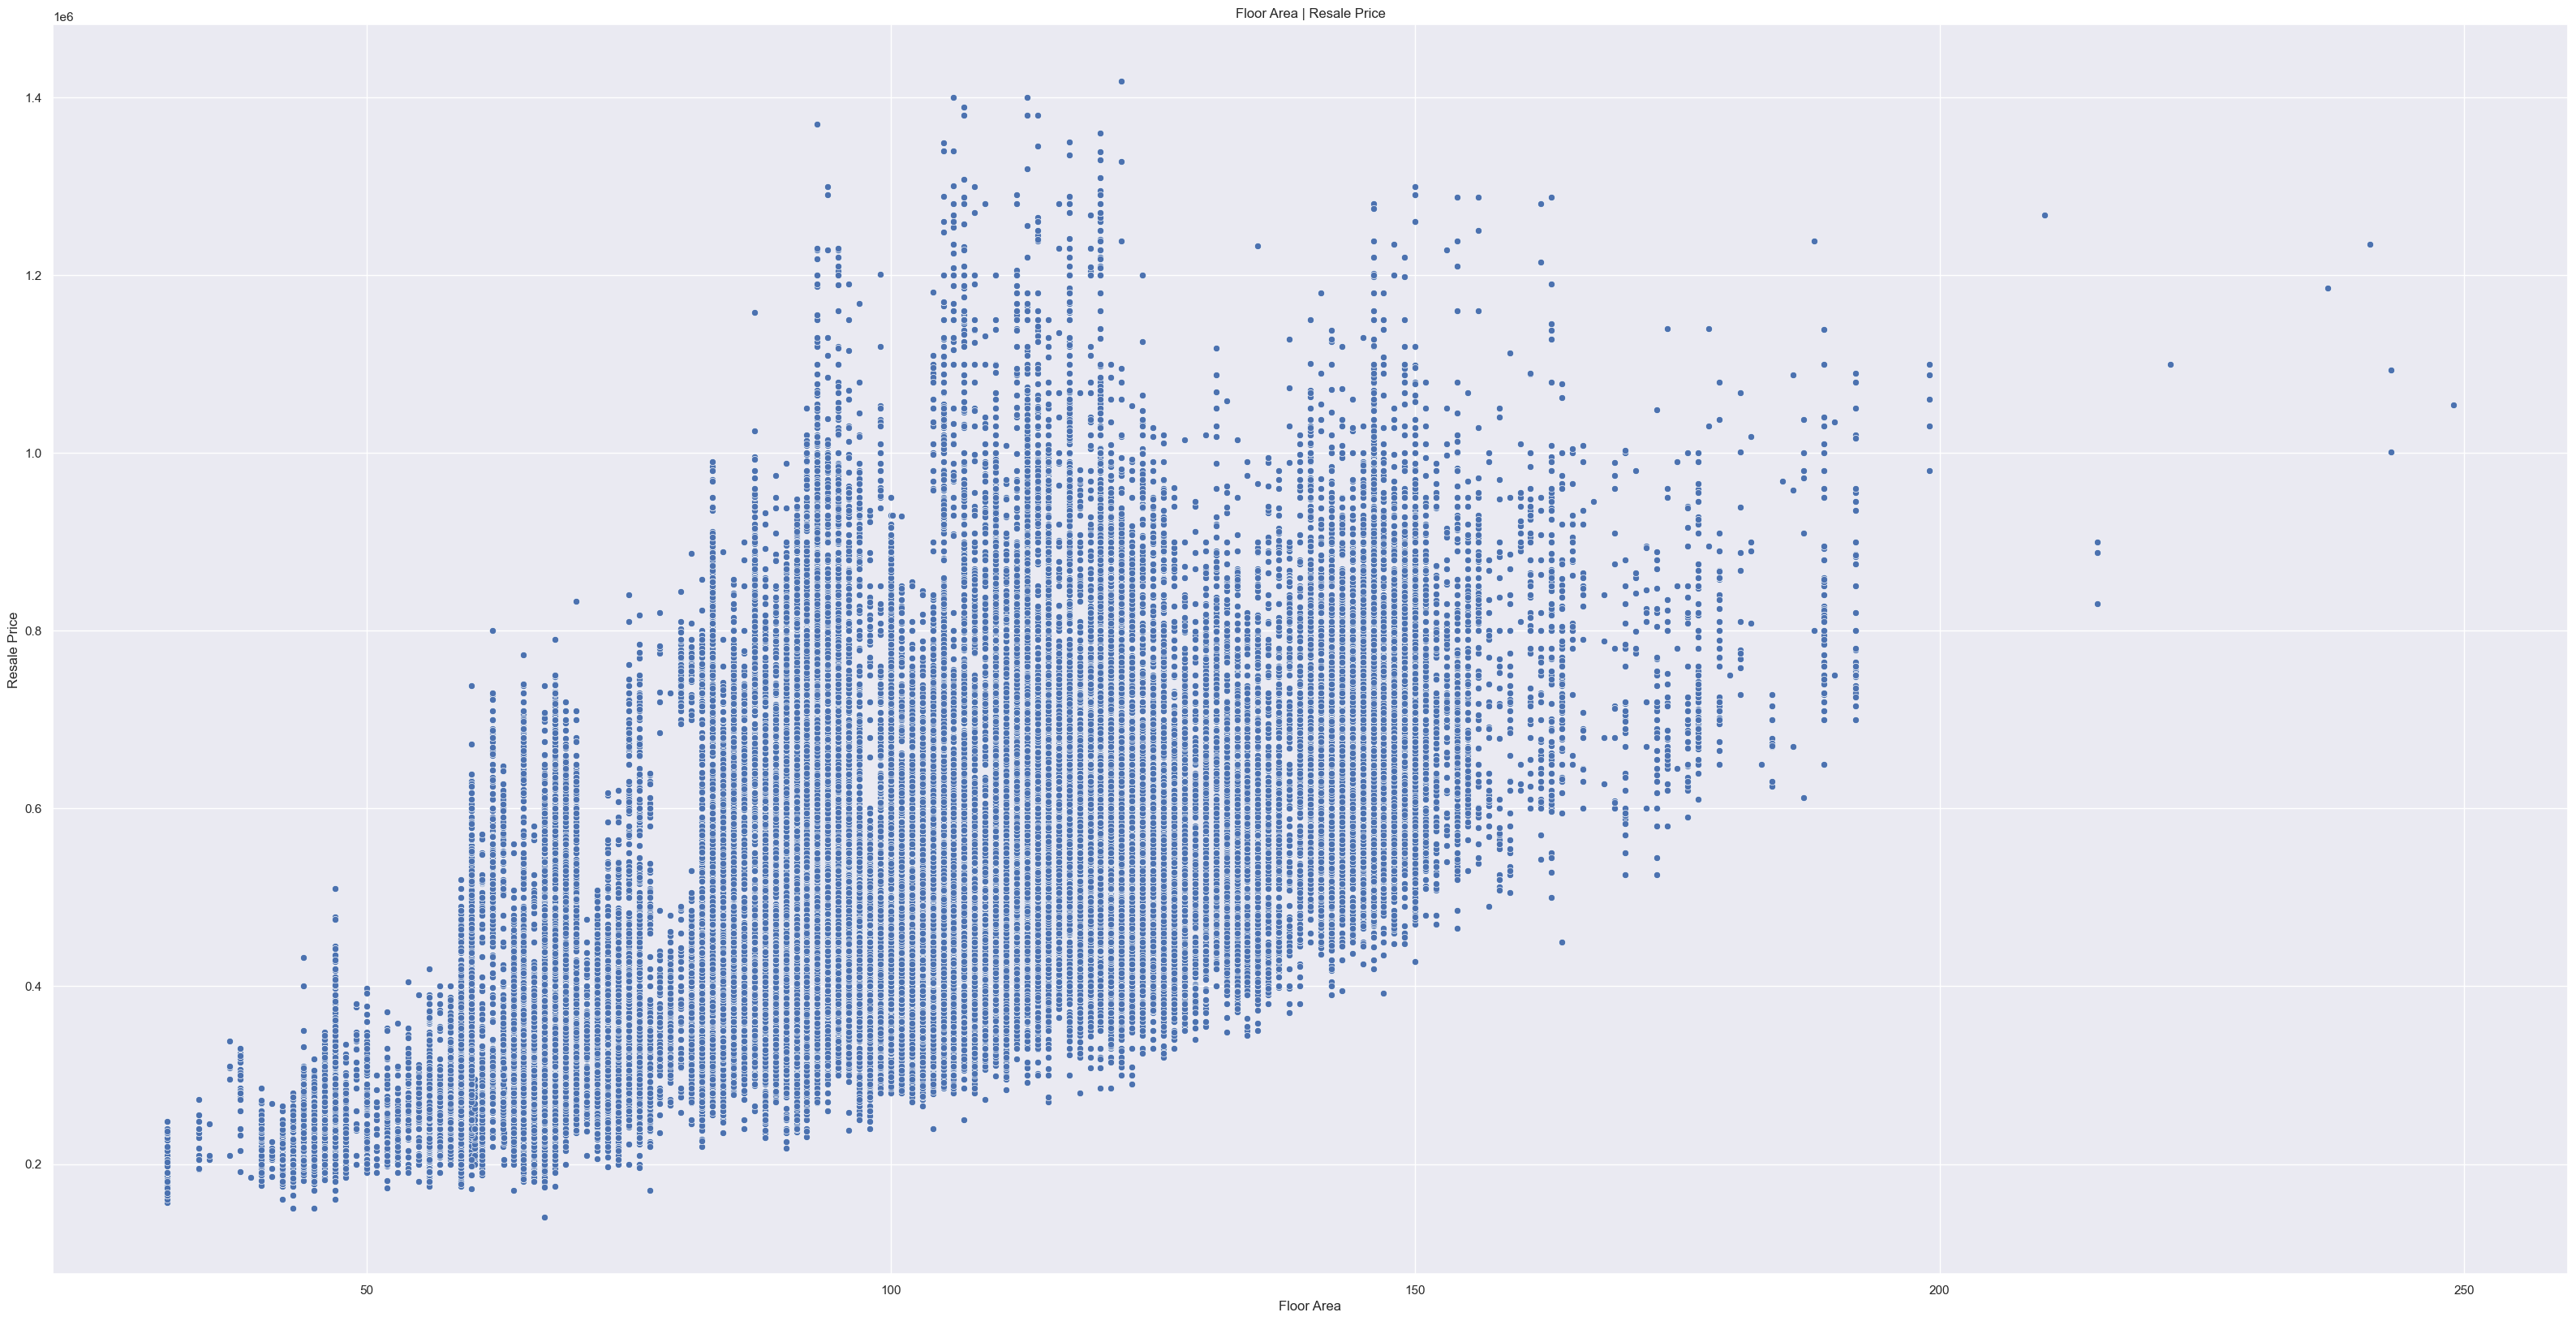

In [4]:
plt.figure(figsize=(40, 20))
sb.scatterplot(data = data[['floor_area_sqm', 'resale_price']], x='floor_area_sqm', y='resale_price')
plt.title('Floor Area | Resale Price')
plt.xlabel('Floor Area')
plt.ylabel('Resale Price')

### <span style="color:blue">Floor Area : As seen in this scatter plot, a positive correlation can be deduced simply by using observations, the exact correlation coefficient will be calculated later on. Thus, we decided to include it into our model.</span>

Text(0, 0.5, 'Resale Price')

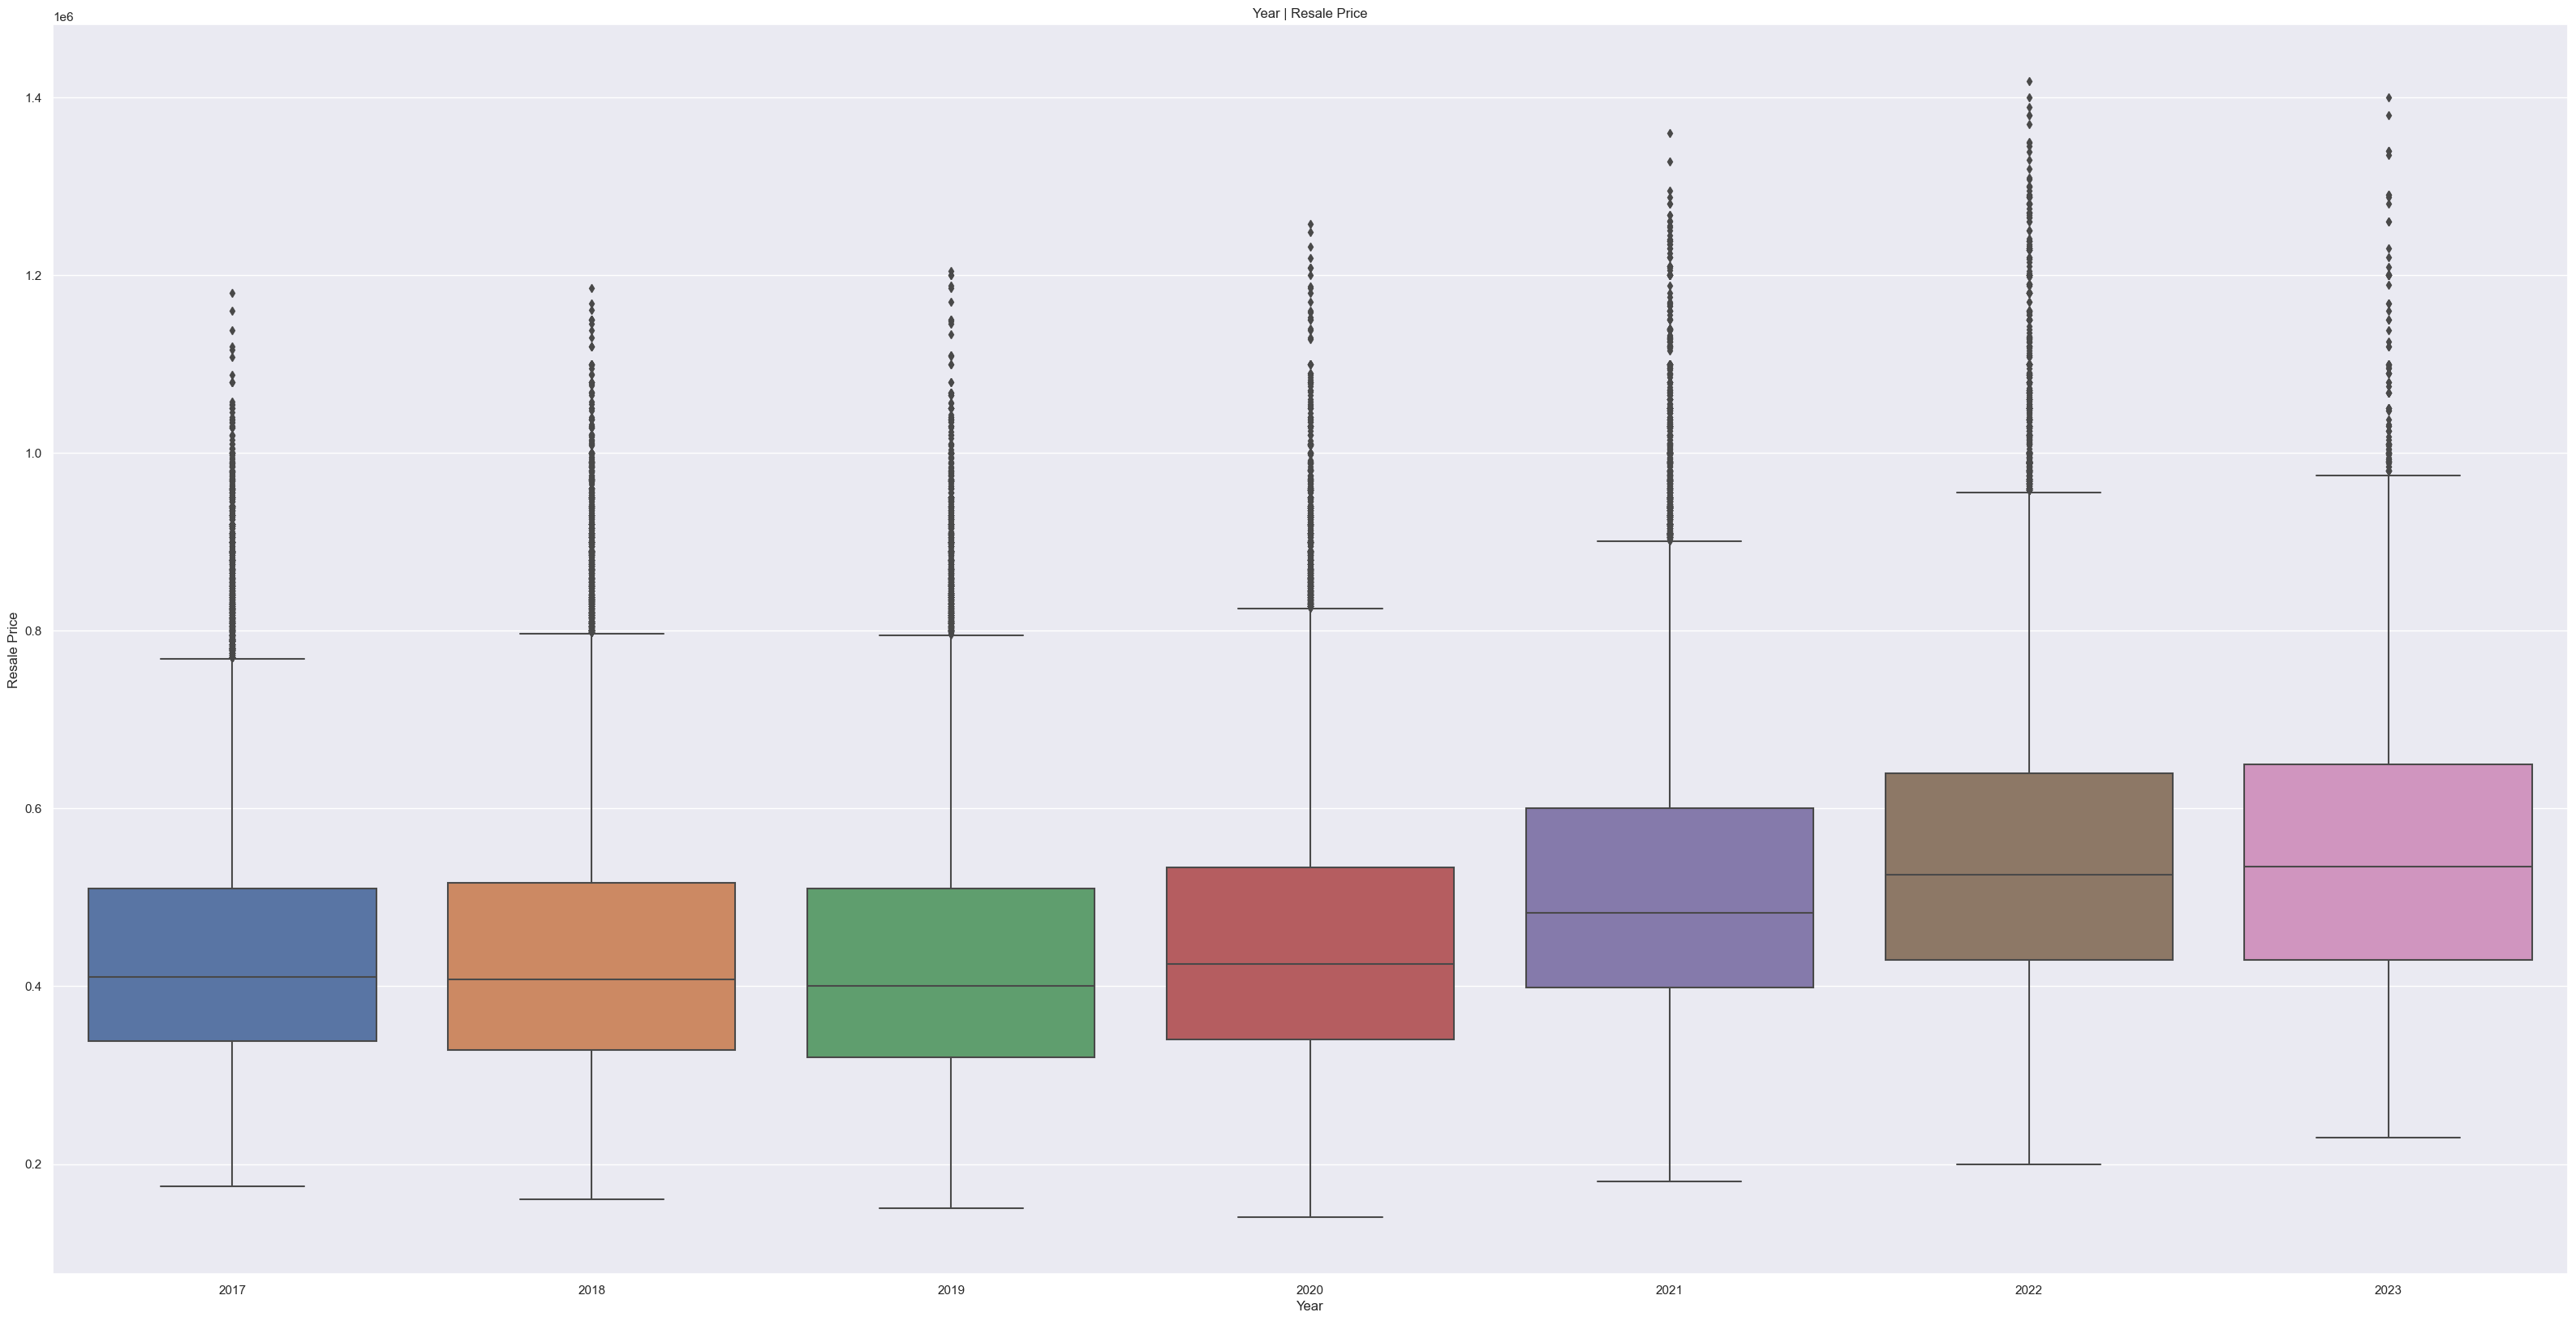

In [5]:
# check correlation of categorical variables and resale_price through graphs
# town | resale_price
plt.figure(figsize=(40, 20))
sb.boxplot(data = data[['year', 'resale_price']], x='year', y='resale_price')
plt.title('Year | Resale Price')
plt.xlabel('Year')
plt.ylabel('Resale Price')

### <span style="color:blue">YEAR : We believe that there are multiple aspects of the economy that will affect the resale price of houses in Singapore.To name some, inflation, economic stability, population growth, demand for houses. Thus, we deduced that year is a variable that we have to take into account during the machine learning.</span>

Text(0, 0.5, 'Resale Price')

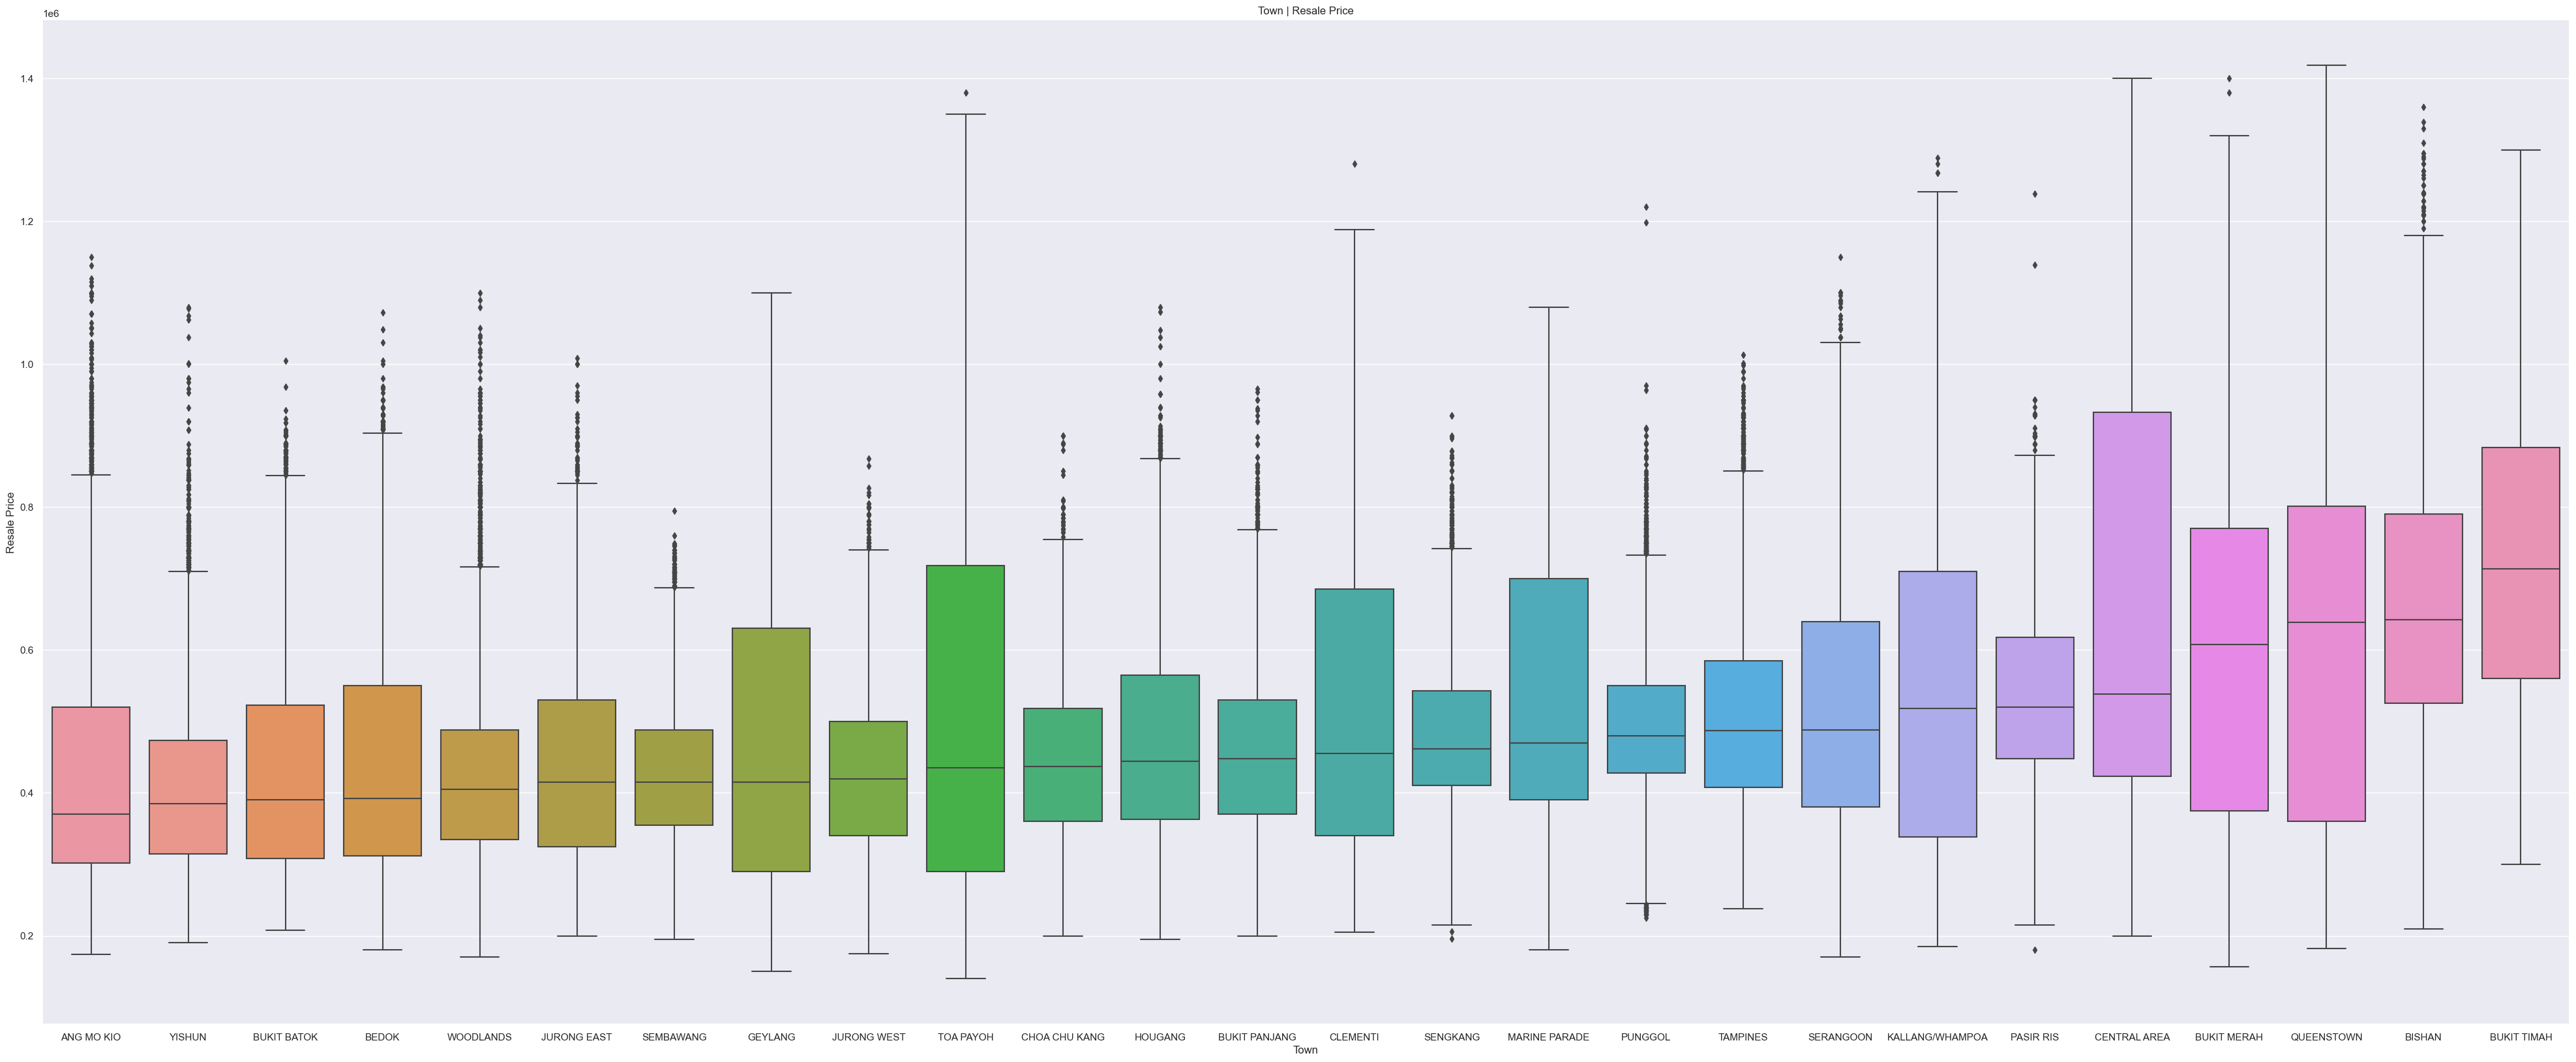

In [6]:
# check correlation of categorical variables and resale_price through graphs
# town | resale_price
plt.figure(figsize=(50, 20))
sb.boxplot(data = data[['town', 'resale_price']], x='town', y='resale_price', order=data[['town', 'resale_price']].groupby('town')['resale_price'].median().sort_values().index)
plt.title('Town | Resale Price')
plt.xlabel('Town')
plt.ylabel('Resale Price')

### <span style="color:blue">TOWN : Town is a crucial variable that will affect the resale price of a house, locations nearer to CBD is known to be more expensive, thus is it important that we include it. However, town is a categorical data that has to be converted into numerical data, this will be shown in the later part of this notebook.</span>

Text(0, 0.5, 'Resale Price')

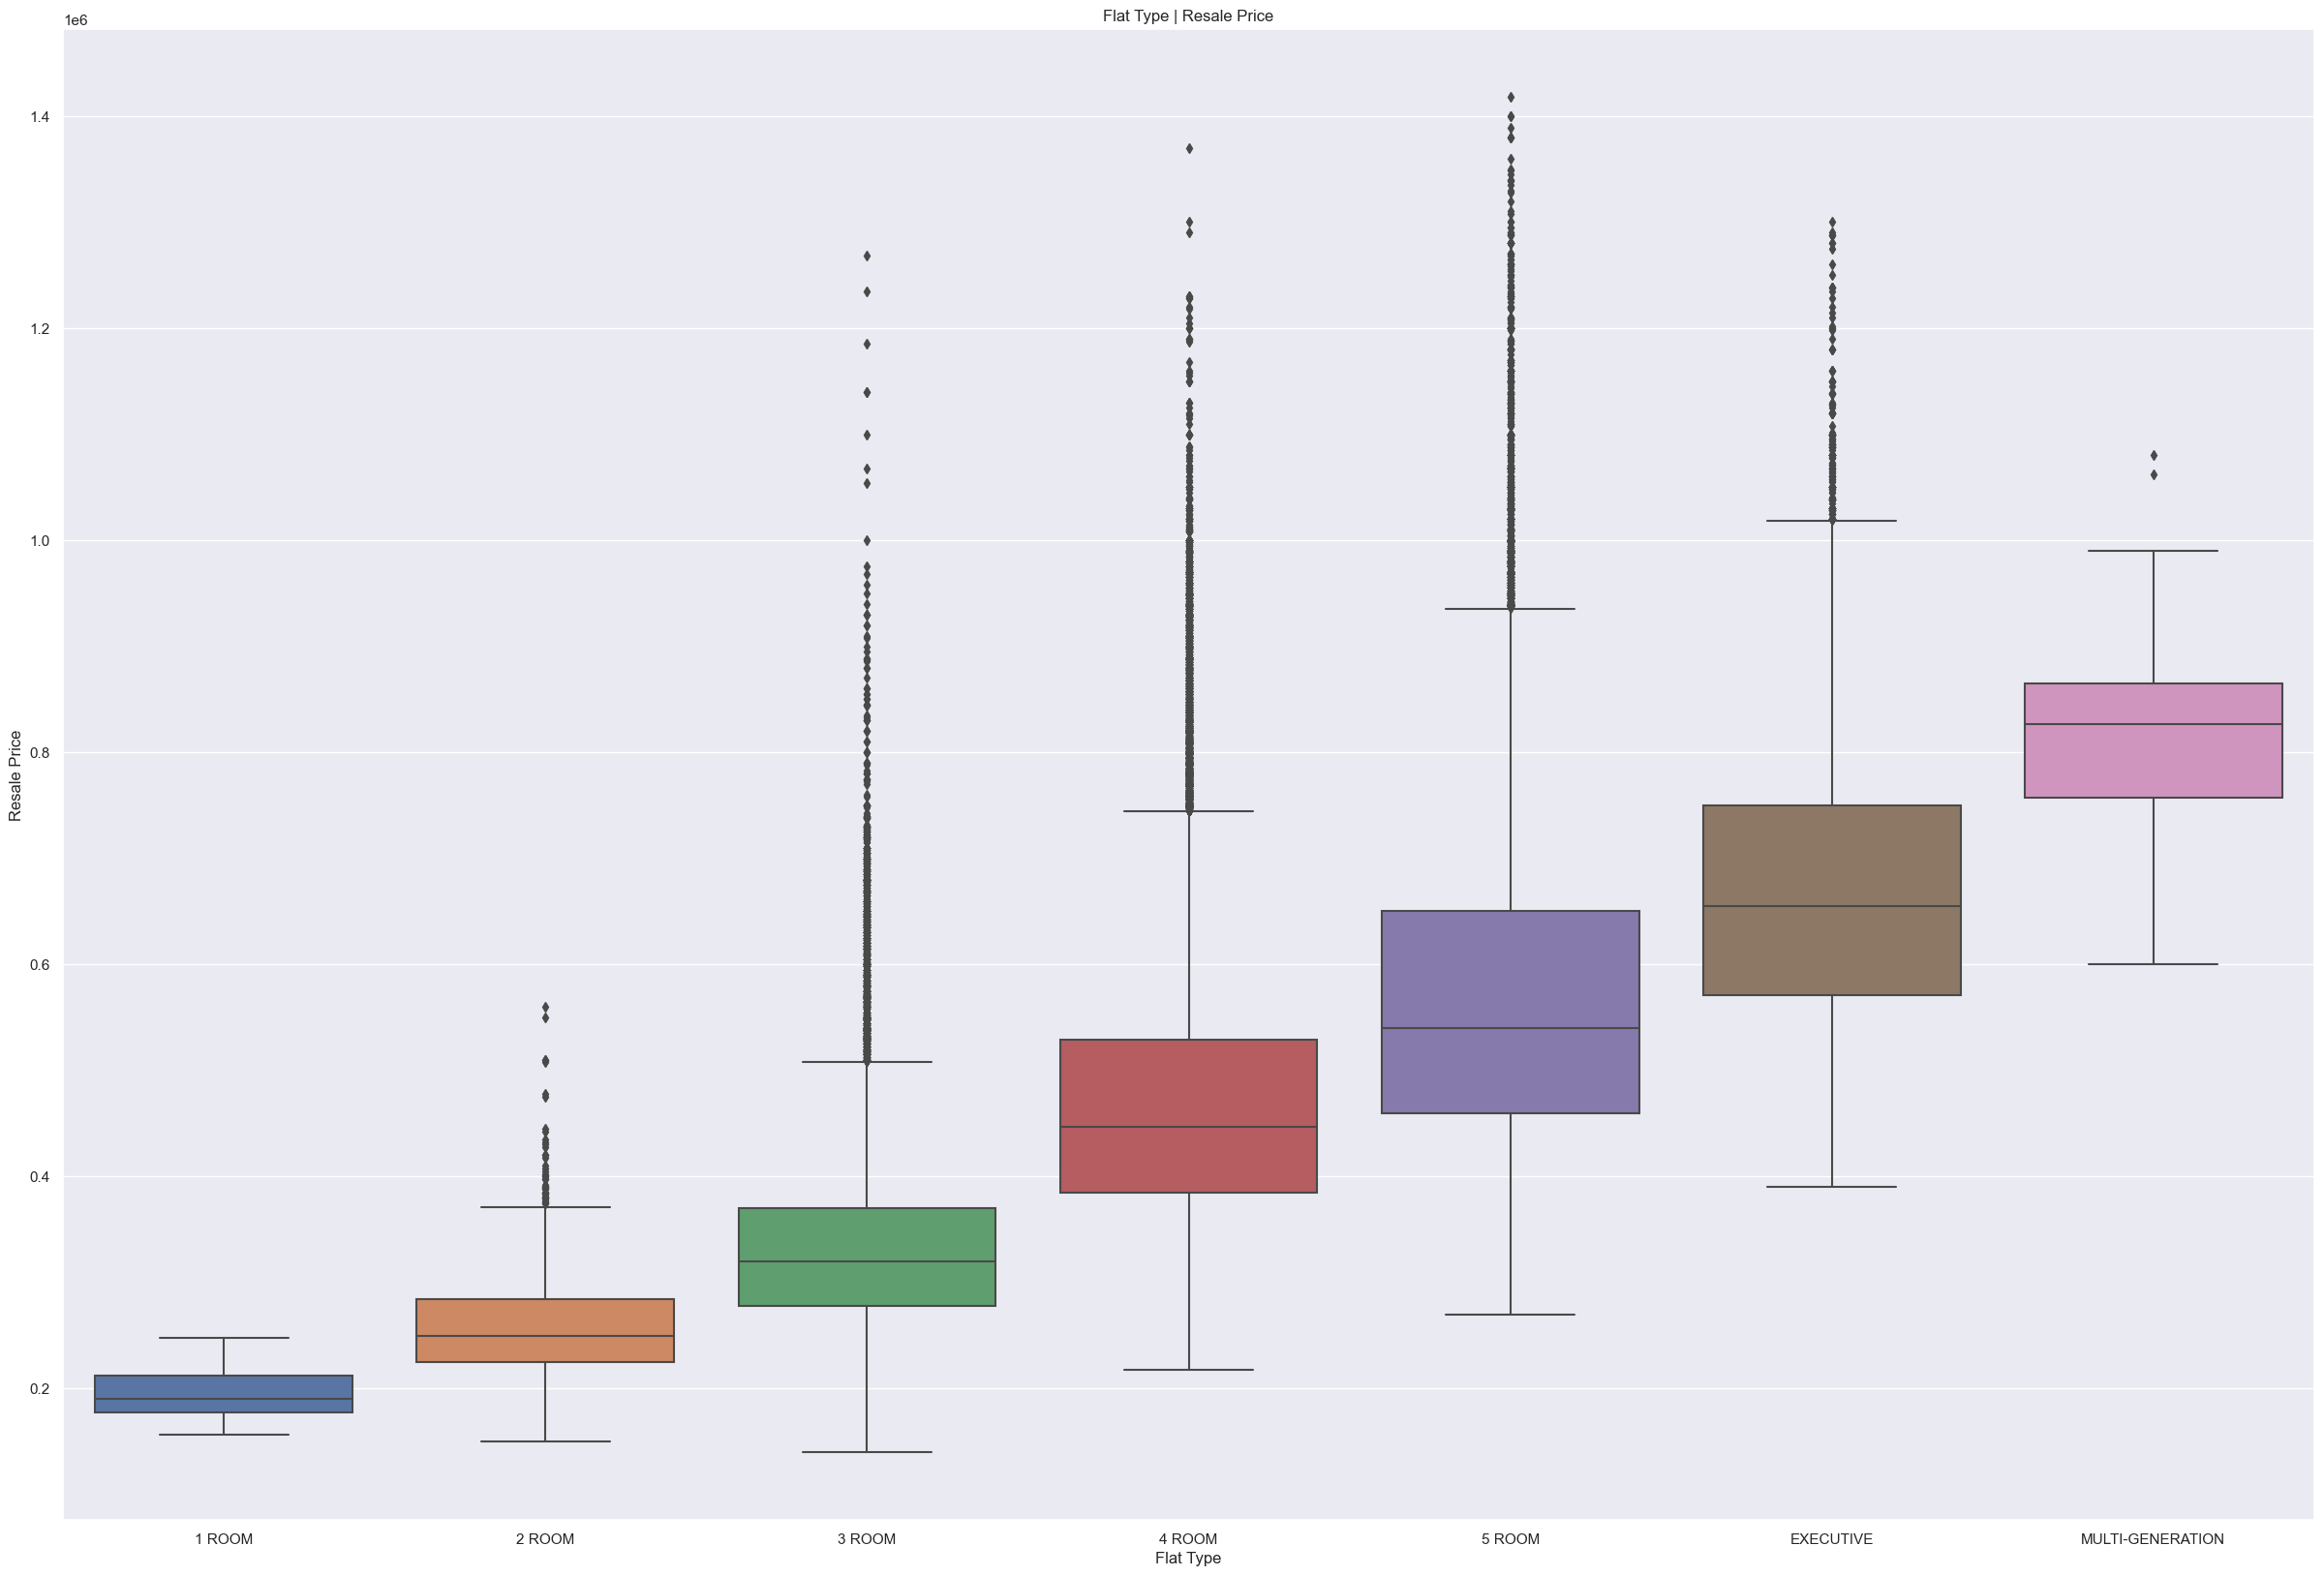

In [7]:
# check correlation of categorical variables and resale_price through graphs
# flat_type | resale_price
plt.figure(figsize=(30, 20))
sb.boxplot(data = data[['flat_type', 'resale_price']], x='flat_type', y='resale_price', order=sorted(data['flat_type'].unique()))
plt.title('Flat Type | Resale Price')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price')

### <span style="color:blue">FLAT TYPE : The number of rooms and the type of house is also another crucial variable that affects the resale price of the house. This variable is in categorical data and will also have to be converted in the later parts of this notebook.</span>

Text(0, 0.5, 'Resale Price')

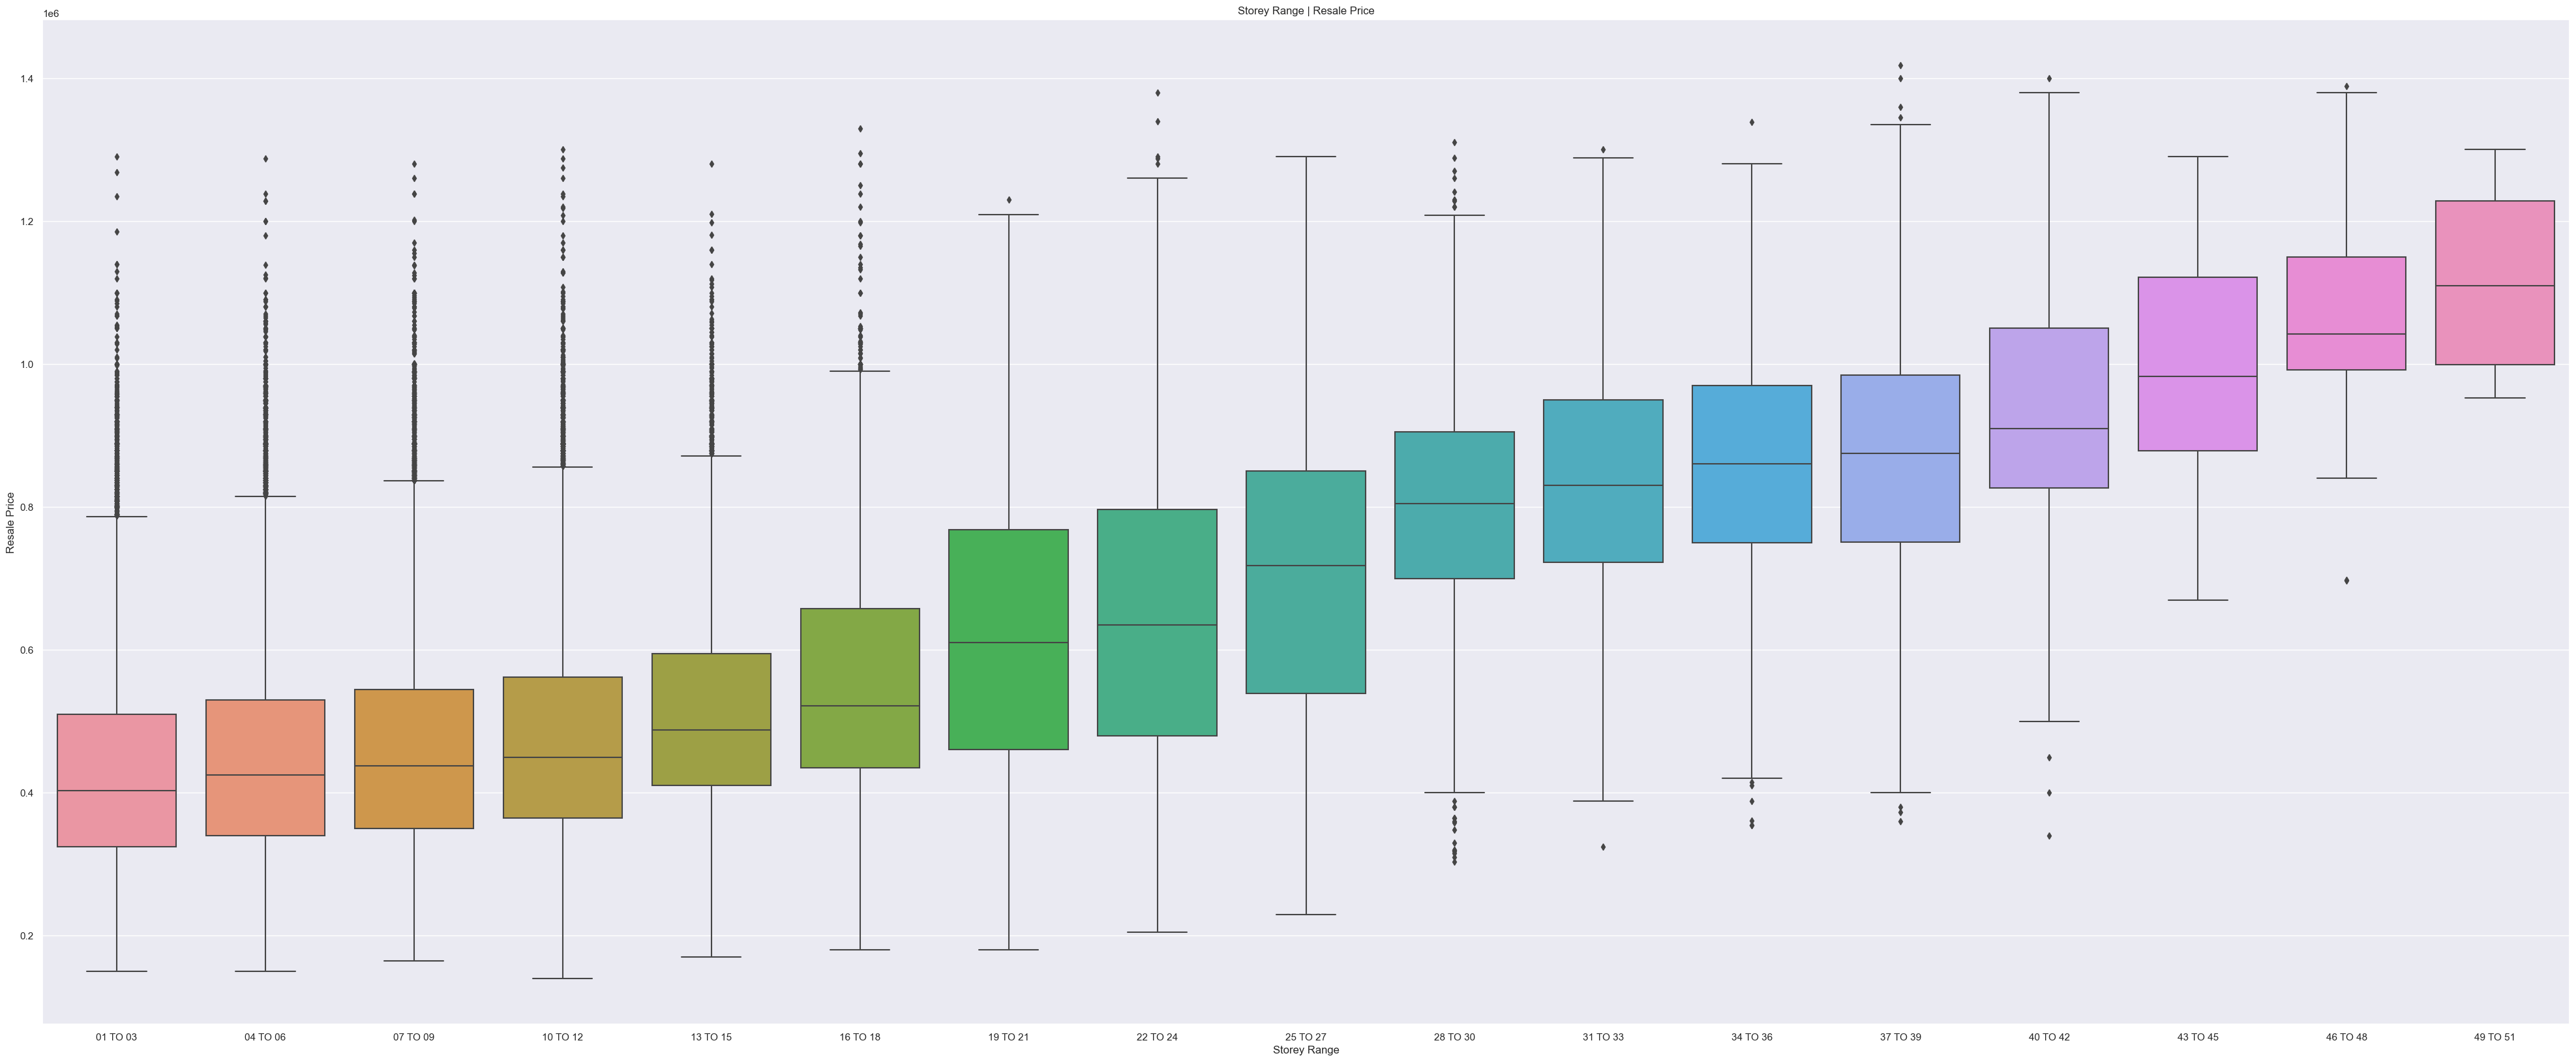

In [8]:
# check correlation of categorical variables and resale_price through graphs
# storey_range | resale_price
plt.figure(figsize=(50, 20))
sb.boxplot(data = data[['storey_range', 'resale_price']], x='storey_range', y='resale_price', order=sorted(data['storey_range'].unique()))
plt.title('Storey Range | Resale Price')
plt.xlabel('Storey Range')
plt.ylabel('Resale Price')

### <span style="color:blue">STOREY RANGE : As seen in this box plot, there is an obvious correlation between resale price and storey range. The higher the storey, the higher the resale price. There is also a need to convert this range into a numerical value which is done in the later part of this notebook.</span>

<AxesSubplot:>

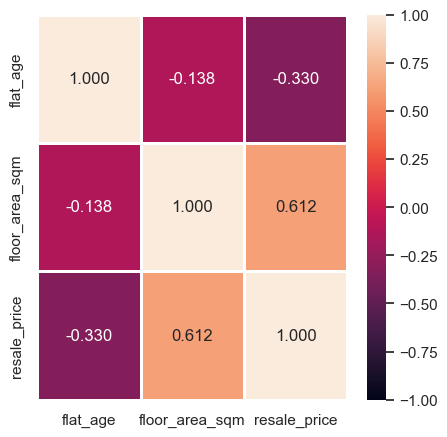

In [9]:
# check correlation of numerical variables and resale_price
# heatmap
f = plt.figure(figsize=(5, 5))
sb.heatmap(data[['flat_age', 'floor_area_sqm', 'resale_price']].corr(), vmin = -1, vmax = 1, linewidths = 1, annot = True, fmt = '.3f')

# <span style="color:brown">Further Cleaning of Data : Converting Categorical to Numerical</span>

### <span style="color:blue">In the codes below, we attempt to convert categorical datas into their respected numerical datas while trying out best to keep their "values" intacted.</span>
### <span style="color:blue">For towns, we decided to use the median resale prices of the individual towns to represent the resale prices of the towns as there are many other factors that can affect the resale price. Thus, median will be a good estimate.</span>
### <span style="color:blue">Our baseline that we compare to, is the town that has the lowest median resale price which is ANG MO KIO as seen in the boxplot above. Every town's median will be a ratio of to this baseline and thus we will be able to convert the categorical data to a numerical one. (lowest possible numerical value is 1) This is shown in the code directly below.</span>

In [10]:
median_prices = pd.DataFrame(data.groupby('town')['resale_price'].median().reset_index())
min_town_median = median_prices.min()

median_prices['town_numeric'] = (median_prices["resale_price"] / min_town_median["resale_price"])
median_prices = median_prices.drop(columns=['resale_price'])

if ('town_numeric' not in data.columns):
    data = pd.merge(data, median_prices, on='town')
    

### <span style="color:blue">For remaining lease, we are simply coverting it into an int type.</span>
### <span style="color:blue">For storey range, we made use of the range and found the average for it.</span>
### <span style="color:blue">For flat type, we can see in the box plot above that median of executive flat is higher than 5 room flats but lower than Multi-generation flats, thus we assigned it a value of 6(rooms). The Multi-generation flats are assigned a value of 7(rooms) since the median is the highest among all other flat types.</span>

In [11]:
if ('lease_commence_date' in data.columns):
    pattern = r'(\d+)'
    #Reformatting remaining lease to integer (years)
    data['remaining_lease'] = data['remaining_lease'].str.extract(pattern, expand=False)
    data['remaining_lease'] = pd.to_numeric(data['remaining_lease'], errors='coerce').astype('Int64')

    #Reformatting storey range to integer (average of it)
    data['storey_range'] = data['storey_range'].str.extract(pattern, expand=False)
    data['storey_range'] = pd.to_numeric(data['storey_range'], errors='coerce').astype('Int64')
    data['storey_range'] = data['storey_range'] + 1

    #Reformatting flat_type to just integer (number of rooms) Executive will be treated as 6 and Multi-Gen will be 
    #treated as 7 according to box plot above.
    data.loc[data['flat_type'] == 'EXECUTIVE', 'flat_type'] = '6 ROOM'
    data.loc[data['flat_type'] == 'MULTI-GENERATION', 'flat_type'] = '7 ROOM'
    data['flat_type'] = data['flat_type'].str.extract(pattern, expand=False)
    data['flat_type'] = pd.to_numeric(data['flat_type'], errors='coerce').astype('Int64')

    #Further cleaning
    data = data.drop(columns=['lease_commence_date'])
    
data.head()

,year,flat_age,town,flat_type,storey_range,floor_area_sqm,remaining_lease,resale_price,town_numeric
0,2017,38,ANG MO KIO,2,11,44.0,61,232000.0,1.0
1,2017,39,ANG MO KIO,3,2,67.0,60,250000.0,1.0
2,2017,37,ANG MO KIO,3,2,67.0,62,262000.0,1.0
3,2017,37,ANG MO KIO,3,5,68.0,62,265000.0,1.0
4,2017,37,ANG MO KIO,3,2,67.0,62,265000.0,1.0


# <span style="color:brown">Machine Learning and Testing Different Models</span>
### <span style="color:blue"> Since we are predicting a numerical value, we believe that regression will work best. In the code below, we attempt different types of regression and evaluate their RMSE to determine which model is the best.

# <span style="color:green">First Model : Linear Regression</span>

In [12]:
# Extract Response and Predictors
y = pd.DataFrame(data["resale_price"])
X = pd.DataFrame(data[["year", "town_numeric", "flat_type", "storey_range", "floor_area_sqm", "remaining_lease"]])

In [13]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (118860, 1) (118860, 6)
Test Set  : (29716, 1) (29716, 6)


<AxesSubplot:>

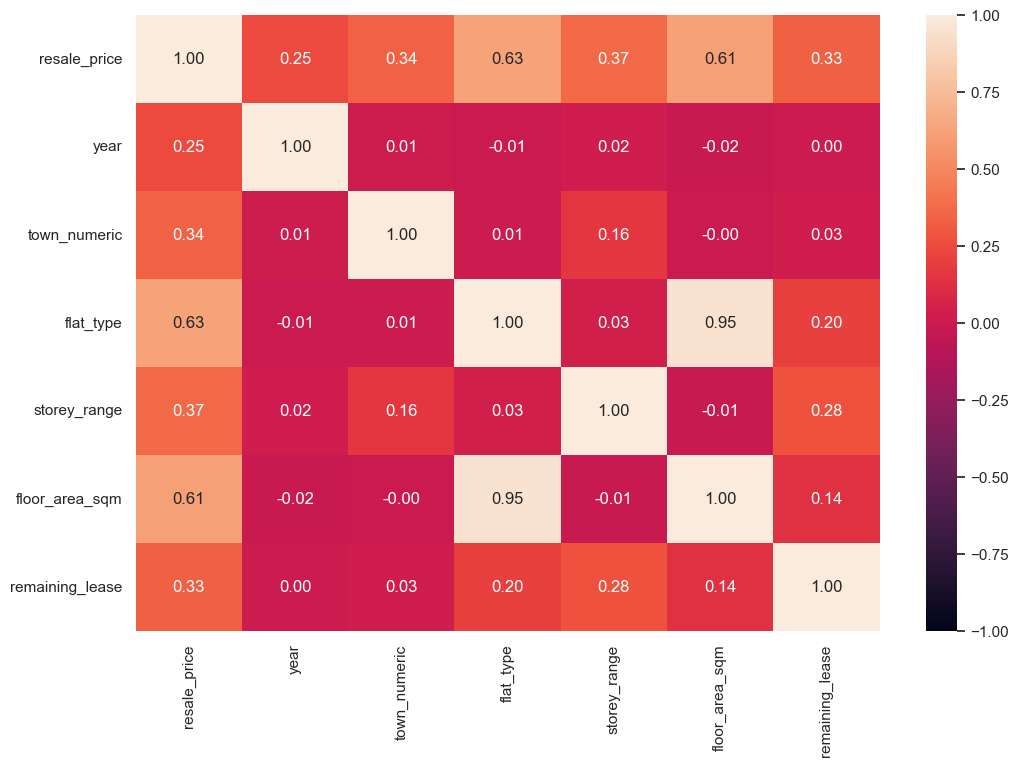

In [14]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

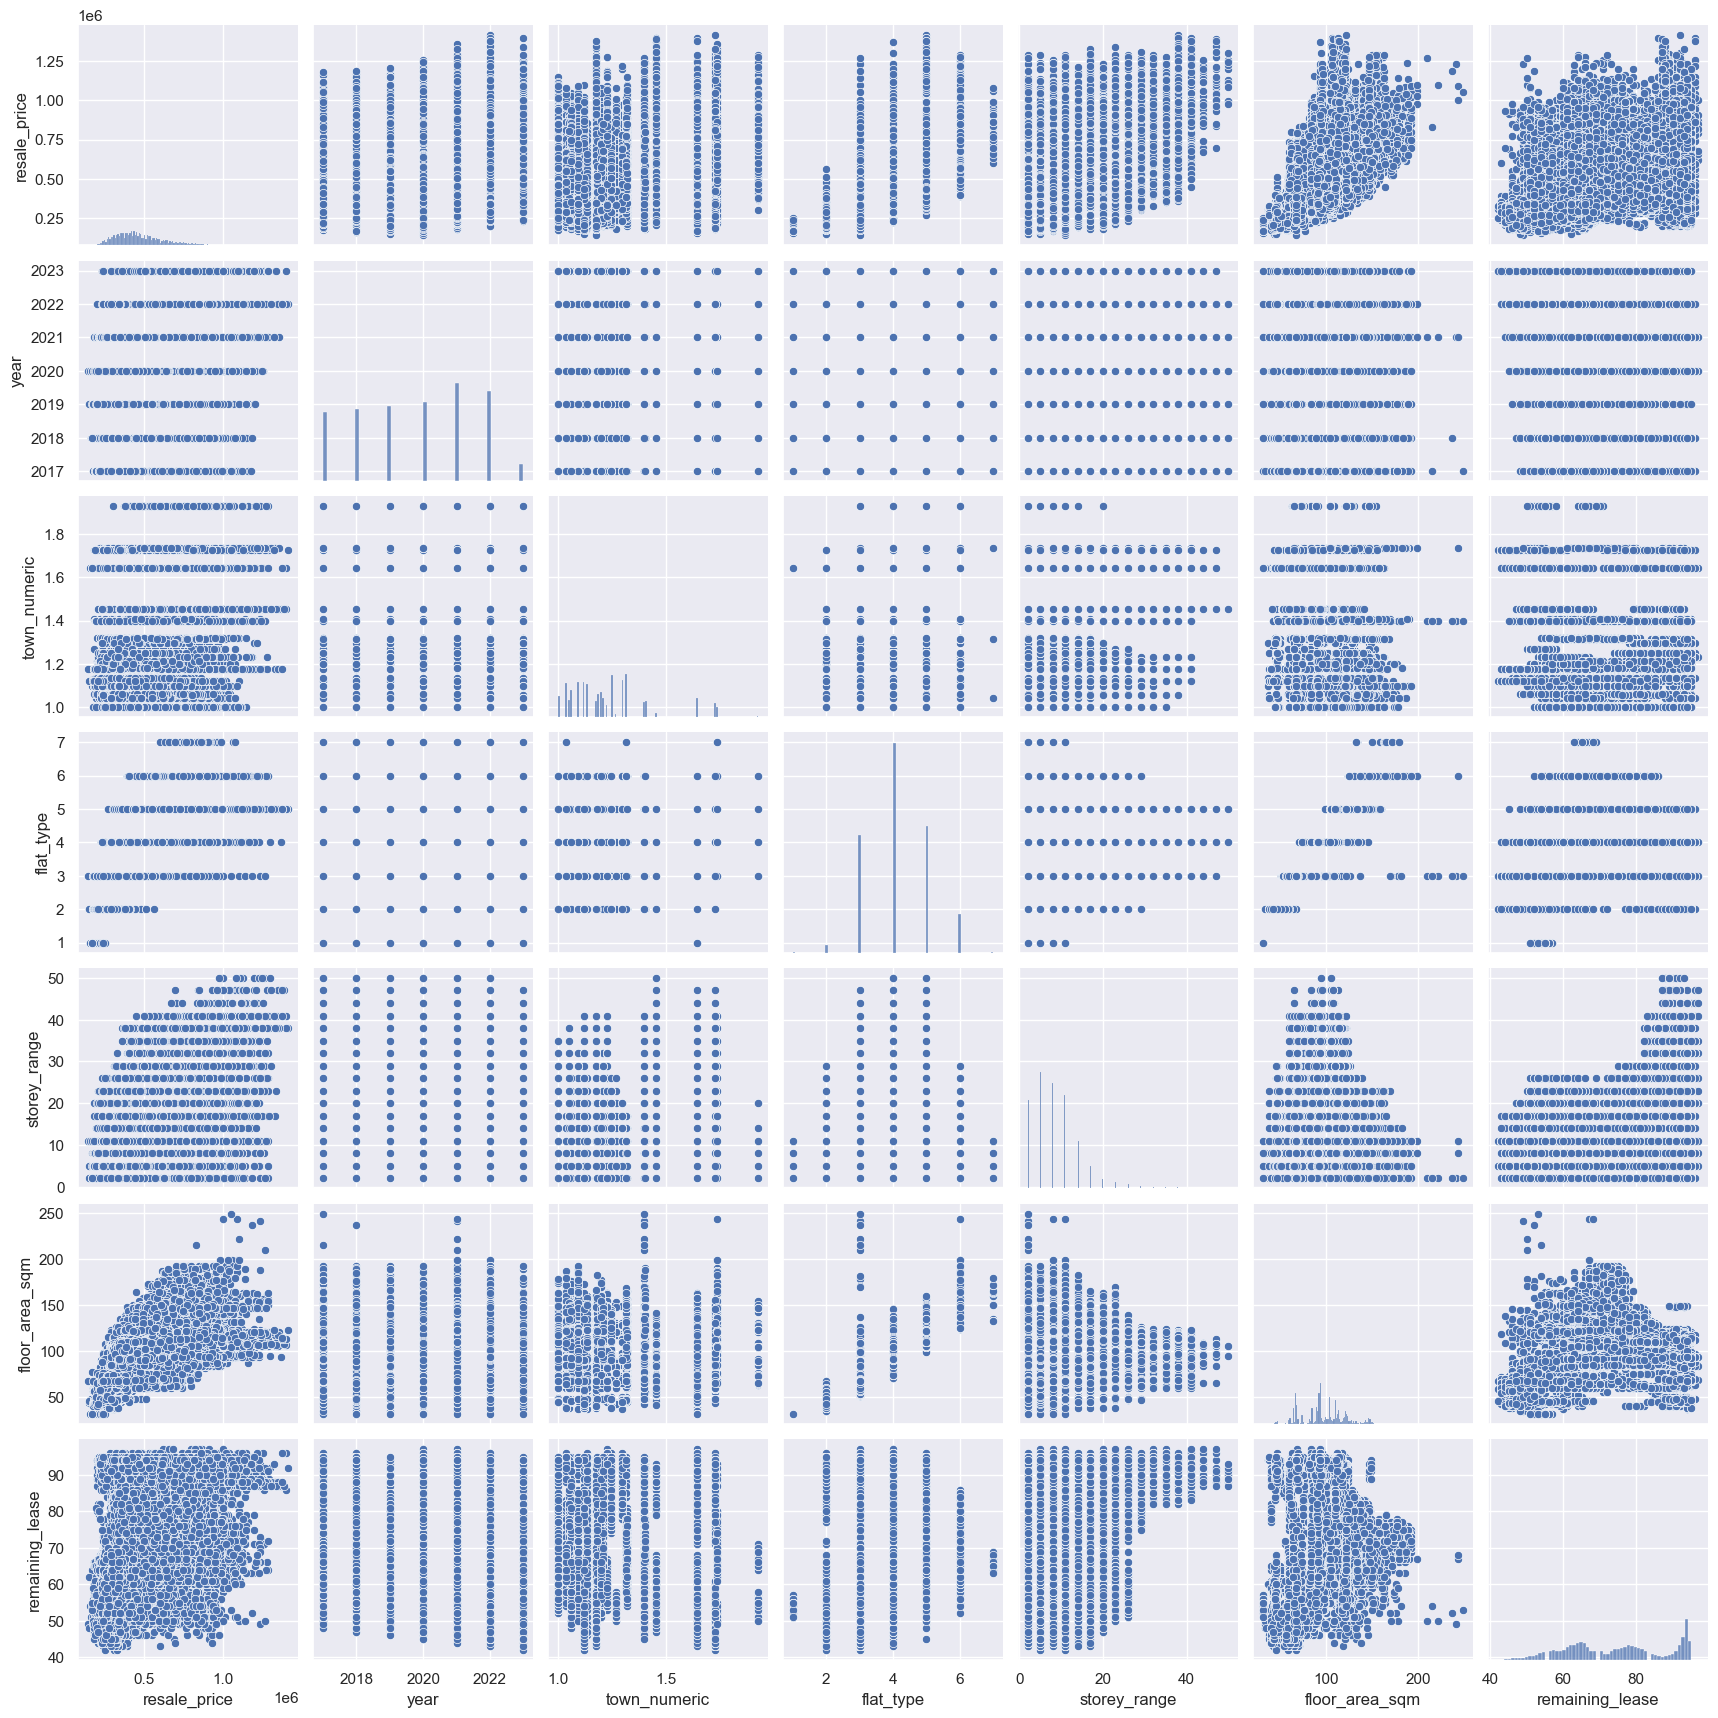

In [15]:
# Relationship between Response and the Predictors
sb.pairplot(data = trainDF)

In [16]:
# Linear Regression using Train Data
lr = LinearRegression()         # create the linear regression object
lr.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', lr.intercept_)
print('Coefficients of Regression \t: a = ', lr.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, lr.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [-46658896.10660013]
Coefficients of Regression 	: a =  [[ 22870.95141361 259304.53595937  31400.59344692   7596.2655913
    2978.49104163   1841.88399432]]



,Predictors,Coefficients
0,year,22870.951414
1,town_numeric,259304.535959
2,flat_type,31400.593447
3,storey_range,7596.265591
4,floor_area_sqm,2978.491042
5,remaining_lease,1841.883994


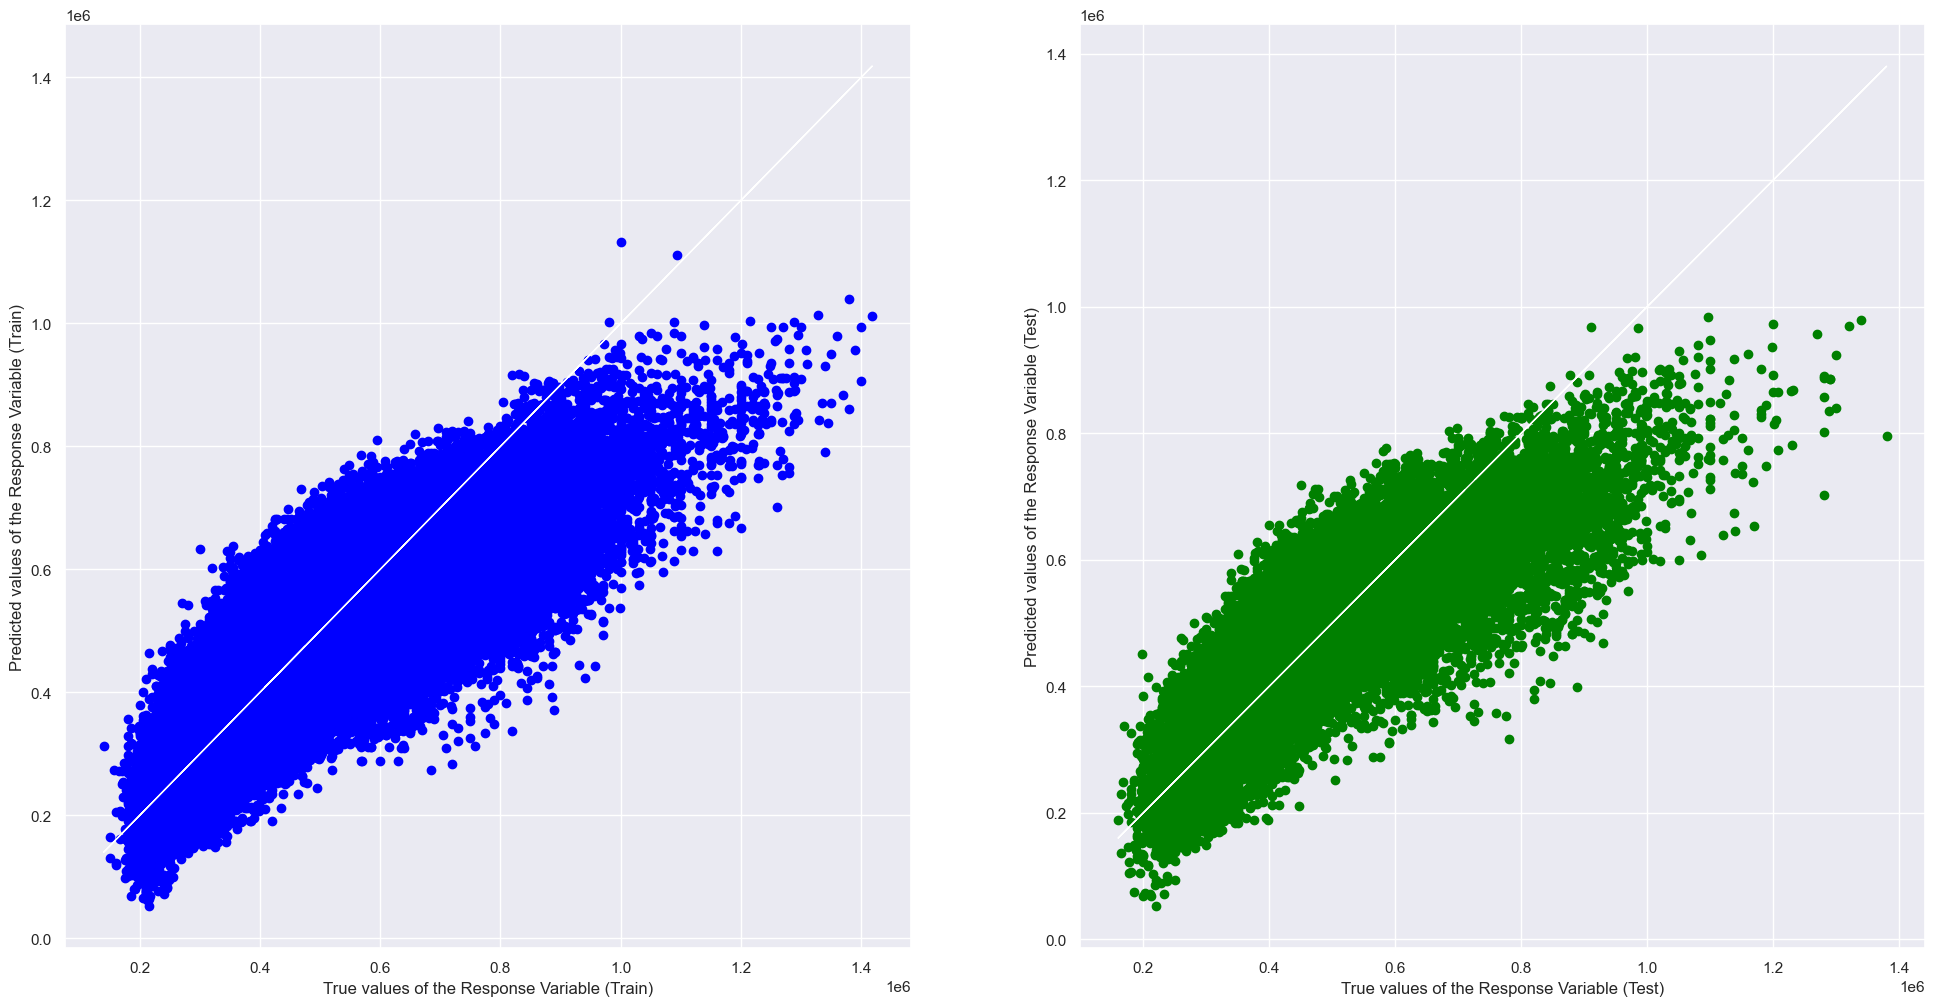

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6805681526030596
Mean Squared Error (MSE) 	: 8789445771.053469
Root Mean Squared Error (MSE) 	: 93752.04409000088

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6740532777696556
Mean Squared Error (MSE) 	: 8925548903.442854
Root Mean Squared Error (MSE) 	: 94475.12319887629



In [17]:
# Predict the Total values from Predictors
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", lr.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (MSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", lr.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (MSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()


### <span style="color:blue">As seen in the RMSE above, it ranges around 90000 which is not great considering some flats are around the range of 200000. Thus we have to attempt other forms of regression to improve the model.</span>

# <span style="color:green">Second Model : Non-linear Regression (Degree 2)</span>

### <span style="color:blue">Predictors are transformed into polynomial terms before fitting the model. This allows the model to capture nonlinear relationships between the predictors and the response by fitting a curved line instead of a straight line.</span>
### <span style="color:blue">We first start out with degree 2 to see if a non-linear regression is any better than a linear regression, if it performs better, we will continue to evaluate and analysis other degrees.</span>

In [18]:
# Create polynomial features up to degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a linear regression object
linreg = LinearRegression()

# Fit the linear regression model on the polynomial features
linreg.fit(X_train_poly, y_train)

# Predict on train and test sets
y_train_pred = linreg.predict(X_train_poly)
y_test_pred = linreg.predict(X_test_poly)

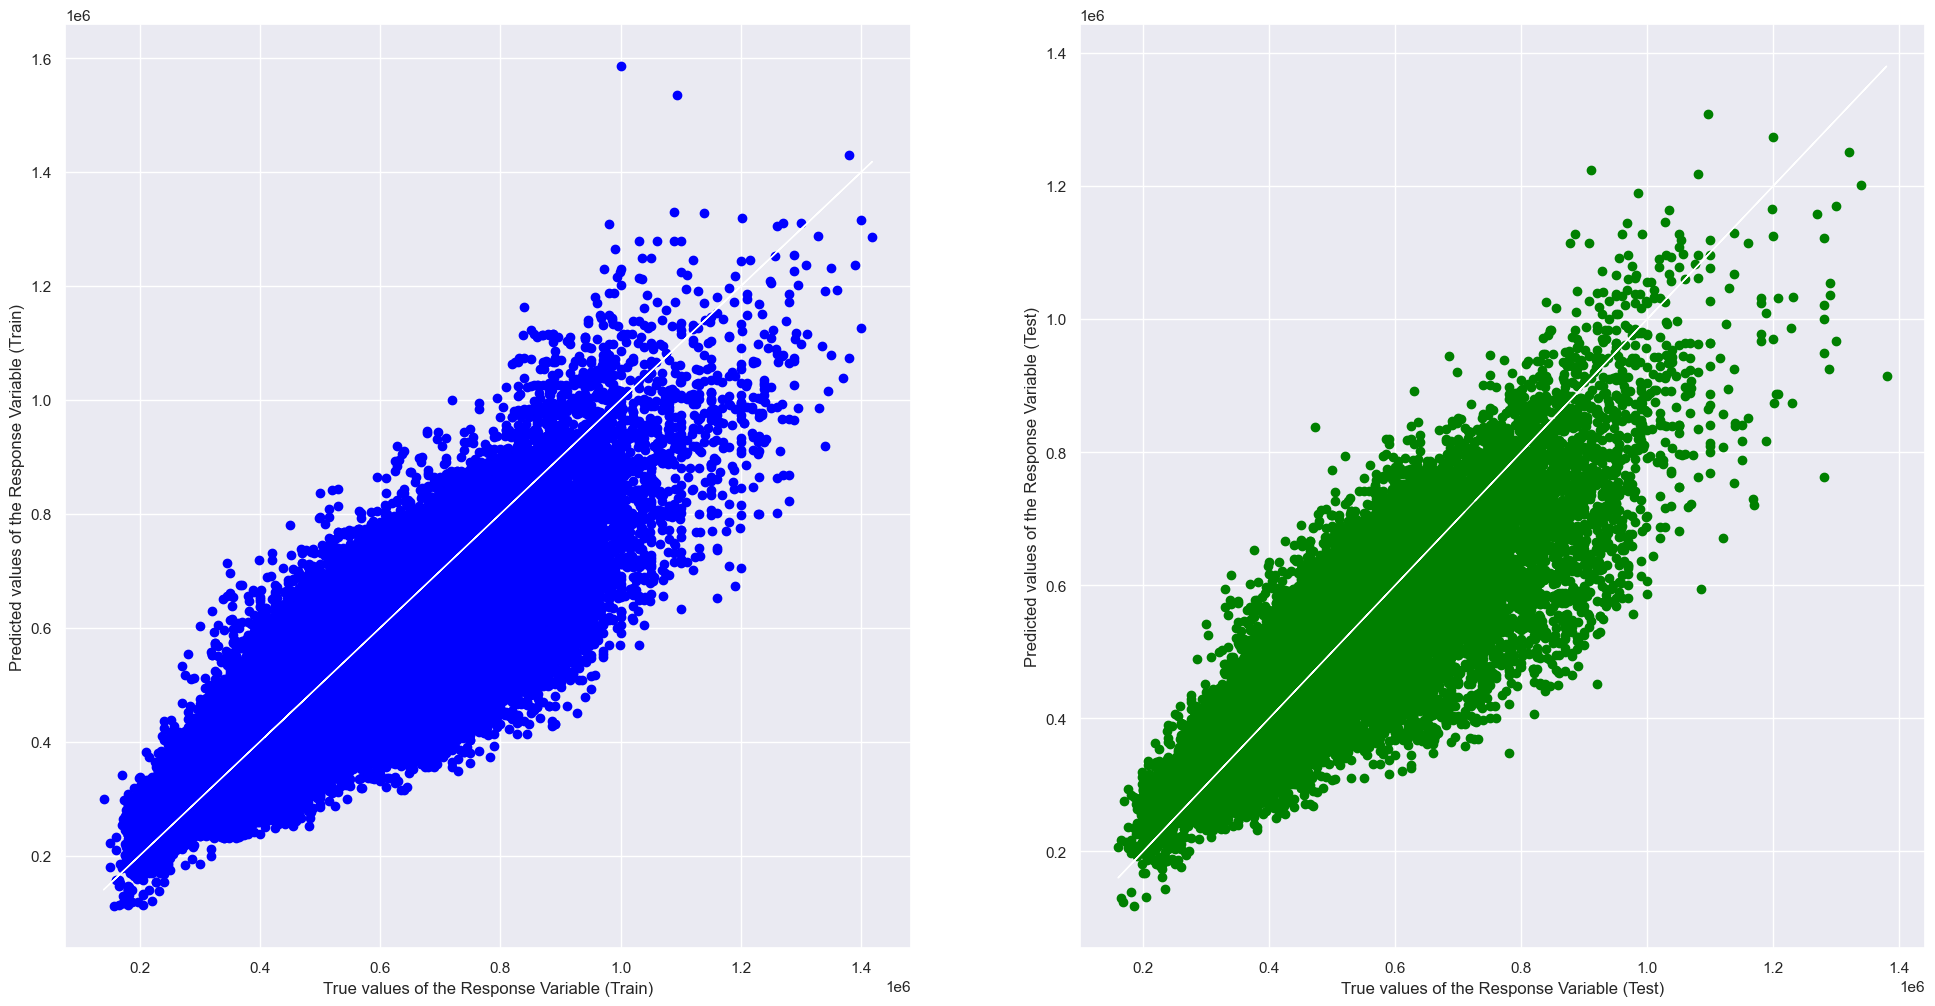

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7601333559829896
Mean Squared Error (MSE) 	: 6600139832.808336
Root Mean Squared Error (MSE) 	: 81241.24465324455

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.755474407238818
Mean Squared Error (MSE) 	: 6695956693.164431
Root Mean Squared Error (MSE) 	: 81828.82556388323



In [19]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train_poly, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (MSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test_poly, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (MSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()


### <span style="color:blue">As seen in the RMSE, it ranges around 80000, which is 10000 less than that of the Linear Regression model. Thus, we continue to evaluate other degrees.</span>

# <span style="color:green">GridSearchCV to get the optimal degree for Polynomial Regression</span>
### <span style="color:blue">In the code below, we ran the model from degree 1 to degree 10, the RMSE of the Polynomial Regression is compared and returns the Degree corresponding to the lowest RMSE. This allows us to choose the best degree without overfitting the non linear regression model.</span>
### <span style="color:blue">NOTE: The code takes a very long time to run, thus we have attached a screenshot of the outcome.</span>

#### Polynomial Regression (Find Optimal Degree using GridSearchCV)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

#### GridSearchCV (Polynomial Reg up to degree 10)
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(1, 11), 'linearregression__fit_intercept': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=10, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)
#### Optimal/Best Degree
print('Best/Optimal Degree for Polynomial Regression: {}'.format(grid.best_params_))
#### Polynomial Regression Degree 5 and its corresponding RMSE
print('RMSE of Polynomial Regression Degree 5 (from GridSearchCV): {}'.format(-grid.best_score_))

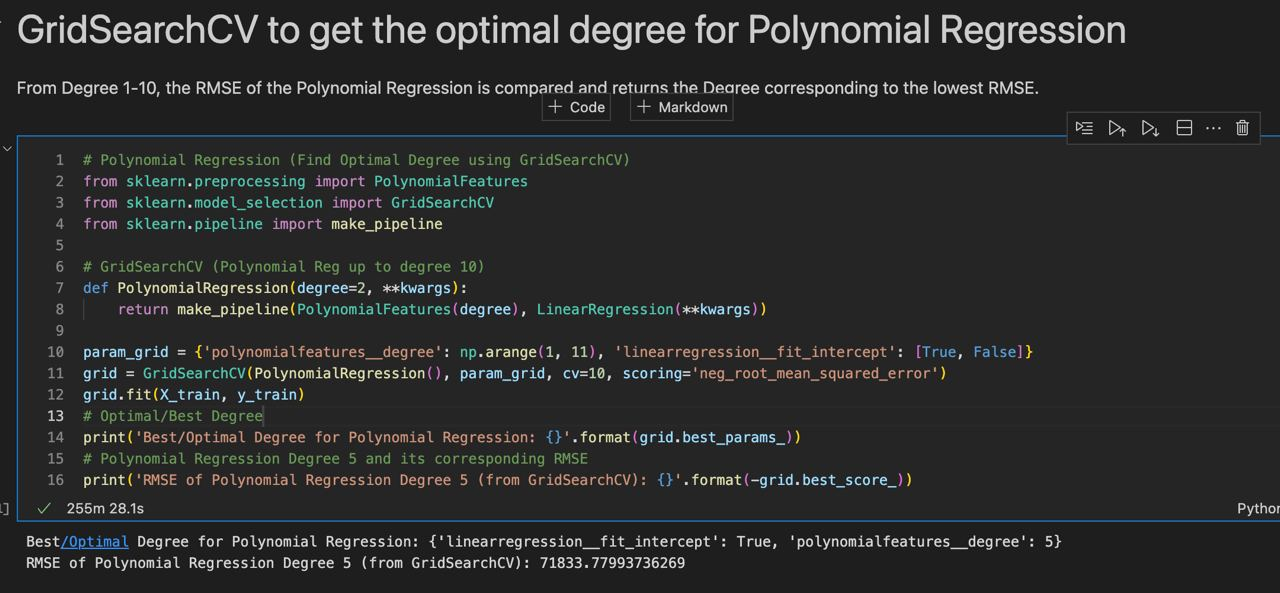

### <span style="color:blue">From above, the optimal degree is 5.</span>
### <span style="color:blue">RMSE of Polynomial Degree = 71833 which is the lowest from Polynomial Regression of Degree 1 - 10.</span>

# <span style="color:green">Third Model : Non-linear Regression (Degree 5 from GridSearchCV)</span>

In [20]:
# Create polynomial features up to degree 5 (optimal/best degree for lowest RMSE)
poly5 = PolynomialFeatures(degree=5)
X_train_poly5 = poly5.fit_transform(X_train)
X_test_poly5 = poly5.transform(X_test)
# Create a linear regression object
linreg5 = LinearRegression()
# Fit the linear regression model on the polynomial features
linreg5.fit(X_train_poly5, y_train)
# Predict on train and test sets
y_train_pred5 = linreg5.predict(X_train_poly5)
y_test_pred5 = linreg5.predict(X_test_poly5)

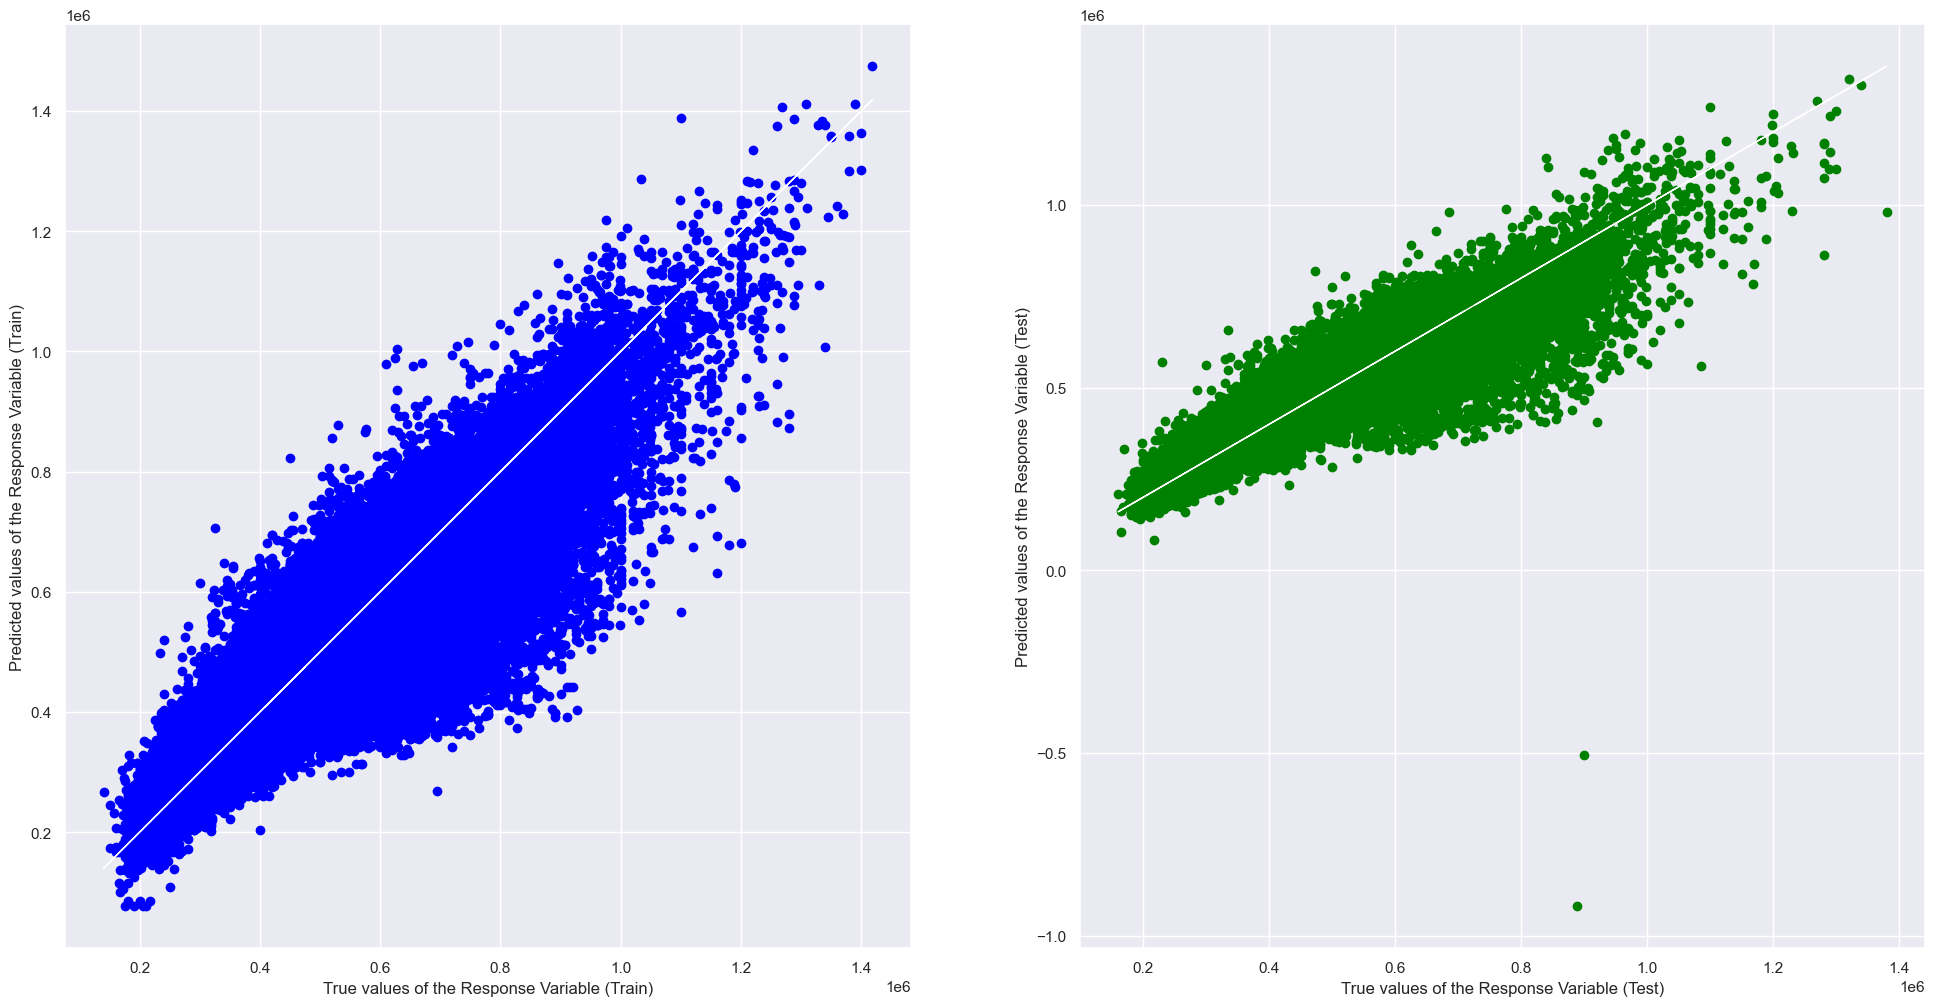

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8160520548661191
Mean Squared Error (MSE) 	: 5061488081.49945
Root Mean Squared Error (MSE) 	: 71144.13596003152

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8039682227334356
Mean Squared Error (MSE) 	: 5368028255.197617
Root Mean Squared Error (RMSE) 	: 73266.82916025244



In [21]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred5, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred5, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg5.score(X_train_poly5, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred5))
print("Root Mean Squared Error (MSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred5)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg5.score(X_test_poly5, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred5))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred5)))
print()


### Backup model in case Polynomial Regression (Degree 5) produces a negative result.

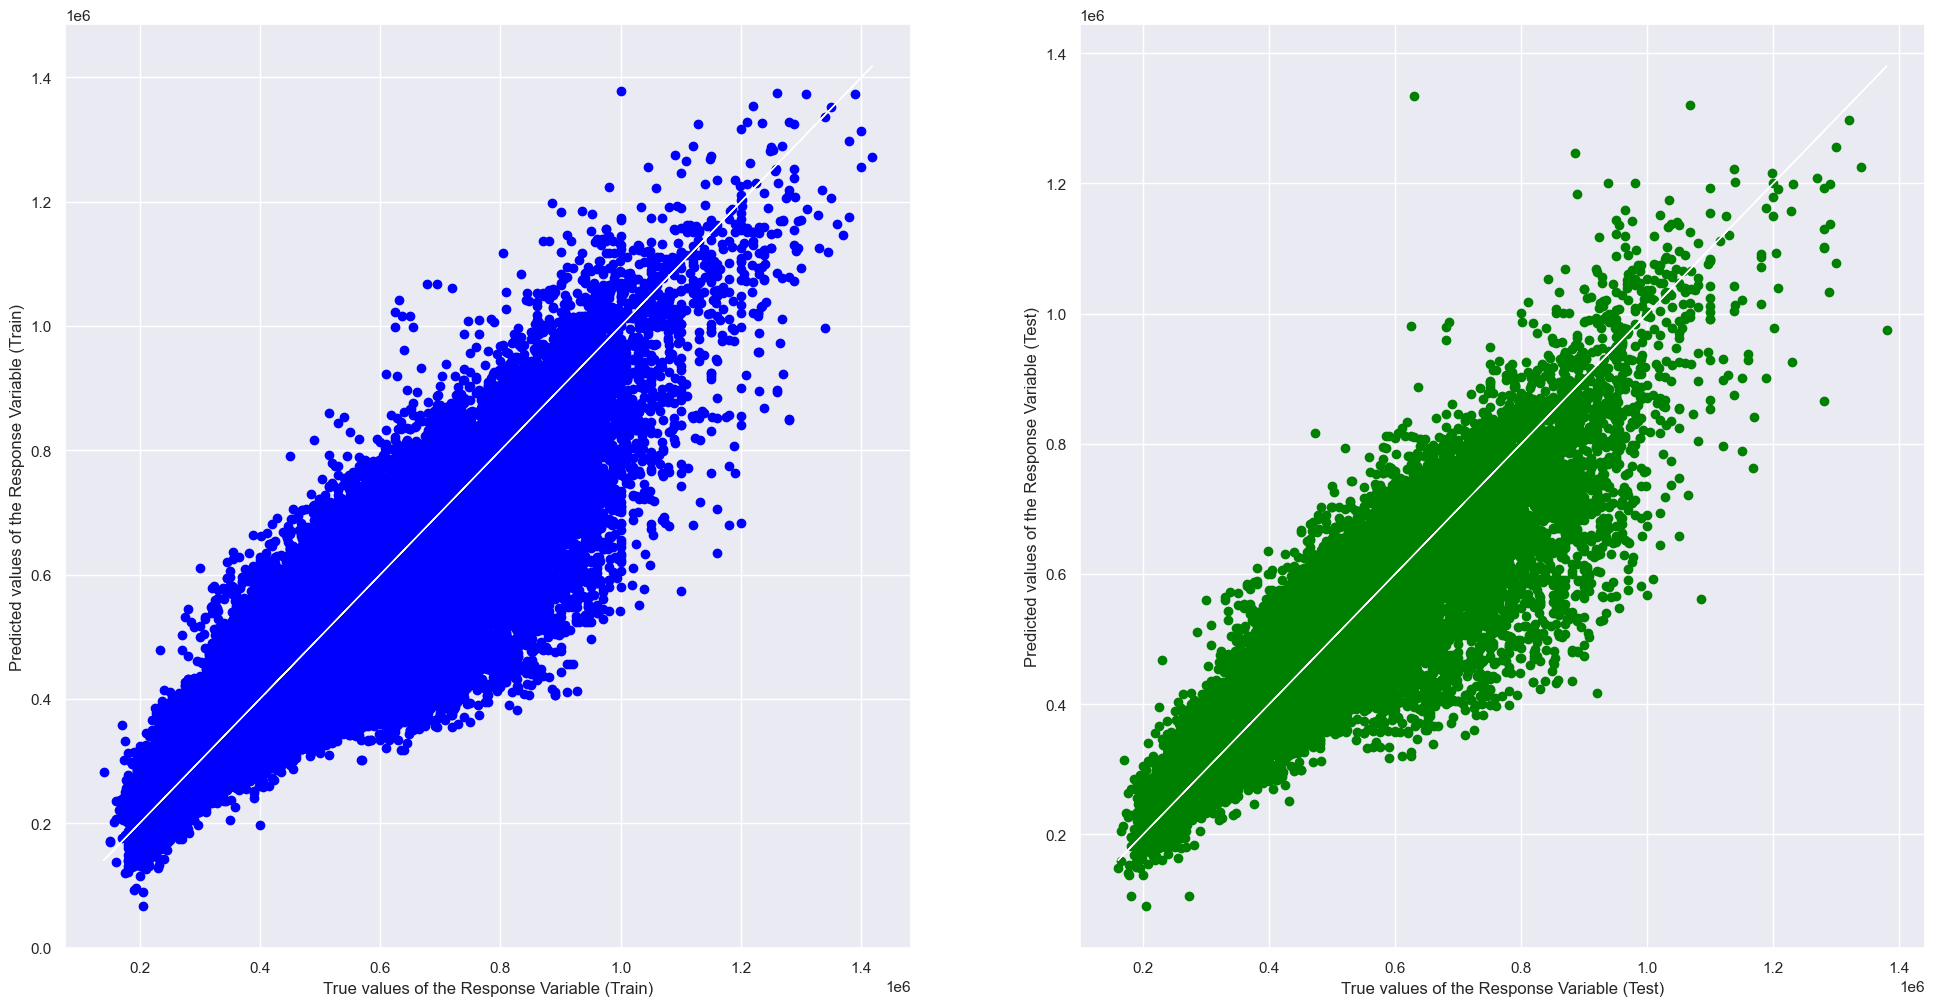

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8084137078036153
Mean Squared Error (MSE) 	: 5271663860.256209
Root Mean Squared Error (MSE) 	: 72606.22466604506

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8022174932417124
Mean Squared Error (MSE) 	: 5415969285.523522
Root Mean Squared Error (RMSE) 	: 73593.26929498052



In [22]:
# poly reg degree 4, to be used iff degree 5 produces a negative resale price
# Create polynomial features up to degree 4 (2nd best)
poly4 = PolynomialFeatures(degree=4)
X_train_poly4 = poly4.fit_transform(X_train)
X_test_poly4 = poly4.transform(X_test)

# Create a linear regression object
linreg4 = LinearRegression()

# Fit the linear regression model on the polynomial features
linreg4.fit(X_train_poly4, y_train)

# Predict on train and test sets
y_train_pred4 = linreg4.predict(X_train_poly4)
y_test_pred4 = linreg4.predict(X_test_poly4)
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred4, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred4, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg4.score(X_train_poly4, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred4))
print("Root Mean Squared Error (MSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred4)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg4.score(X_test_poly4, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred4))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred4)))
print()

## <span style="color:blue">The RMSE of Non Linear regression of Degree 5 has produced a RMSE of around 72000 which is as predicted. Thus we have decided to use this model to predict the resale price.</span>

# <span style="color:red">ATTENTION ! INPUT HERE!</span>

# <span style="color:red">Predicted Resale Price</span>
### <span style="color:blue">In the code below, we get required details from the user regarding their flats, and place them into a dataframe for prediction later on.</span>

In [23]:
columns = ['year', 'town_numeric', 'flat_type', 'storey_range', 'floor_area_sqm', 'remaining_lease']
user_data = pd.DataFrame(columns=columns)
town_array = data['town'].unique()
# print("List of towns: ANG MO KIO, BEDOK, BISHAN, BUKIT BATOK, BUKIT MERAH, BUKIT PANJANG, BUKIT TIMAH, \
# CENTRAL AREA, CHOA CHU KANG, CLEMENTI, GEYLANG, \
# HOUGANG, JURONG EAST, JURONG WEST, KALLANG/WHAMPOA, MARINE PARADE, PASIR RIS, \
# PUNGGOL, QUEENSTOWN, SEMBAWANG, SENGKANG, SERANGOON, TAMPINES, \
# TOA PAYOH, WOODLANDS, YISHUN")

def printAllTowns(town_array):
    print('List of Towns: ', end='')
    for town in town_array:
        if (town == town_array[-1]):
            print(town)
        else:
            print('{}, '.format(town), end='')

def printAllFlatTypes(flat_type_array):
    print("Available flat types in Singapore:")
    i = 1
    for type in flat_type_array:
        print('({0}): {1}'.format(i, type))
        i+=1

# 2 functions min, max for the range of floor area wrt flat type, to limit floor area according to the flat type
# to prevent cases such as 1 room having 100sqm of floor area
def min_floor_area_wrt_flat_type(flat_type):
    return data[data['flat_type'] == flat_type]['floor_area_sqm'].min() - 5

def max_floor_area_wrt_flat_type(flat_type):
    return data[data['flat_type'] == flat_type]['floor_area_sqm'].max() + 5


# start query
printAllTowns(town_array)
      
# user entered 'quit'      
quit = False

# user answered all questions within the requirements
finish = False

while (not(quit) and not(finish)):
    # town
    user_estate = input("Which town is your flat located in? (Enter 'quit' to exit): ").upper()
    while ((user_estate != 'QUIT') and (user_estate not in town_array)):
        print("'{}' is not in our list of towns. Please try a different town from the list below.".format(user_estate))
        printAllTowns(town_array)
        user_estate = input("Which town is your flat located in? (Enter 'quit' to exit): ").upper()
    if (user_estate == 'QUIT'):
        quit = True
        break
    printAllFlatTypes(flat_type_array)
    flat_type = input("What is the flat type (Enter 'quit' to exit): ")
    ########################

    # flat type
    while (flat_type.upper() != 'QUIT'):
        # try to convert to int, if input is string, it will not throw error and exit
        if (flat_type.upper() != 'QUIT'):
            try:
                flat_type = int(flat_type)
                if (flat_type < 0 or flat_type > 7):
                    print('Please enter only the number corresponding to your flat type.')
                else:
                    break
            except (ValueError):
                print('Please enter only the number corresponding to your flat type.')

        printAllFlatTypes(flat_type_array)
        flat_type = input("What is the flat type (Enter 'quit' to exit): ")
    if (str(flat_type).upper() == 'QUIT'):
        quit = True
        break
    #######################

    # year
    year = input("Which year are you intending to sell your flat (Enter 'quit' to exit): ")
    while (year.upper() != 'QUIT'):
        try:
            year = int(year)
            if (year < 1990 or year > 2033):
                print('Please enter only the recent 10 years from the current year.')
            else:
                break
        except (ValueError):
            print('Please enter only numbers for the year.')

        year = input("Which year are you intending to sell your flat (Enter 'quit' to exit): ")
    if (str(year).upper() == 'QUIT'):
        quit = True
        break
    #######################

    # storey
    storey_range = input("What floor (1 - 40) is the flat on (Enter 'quit' to exit): ")
    while (storey_range.upper() != 'QUIT'):
        try:
            storey_range = int(storey_range)
            if (storey_range < 1 or storey_range > 40):
                print('Please enter only 1 - 40 for the floor.')
            else:
                break
        except (ValueError):
            print('Please enter only numbers for the floor.')
        storey_range = input("What floor (1 - 40) is the flat on (Enter 'quit' to exit): ")
    if (str(storey_range).upper() == 'QUIT'):
        quit = True
        break
    #######################

    # floor area sqm
    floor_area_sqm = input("What is the floor area (sqm)(Enter 'quit' to exit): ")
    while (floor_area_sqm.upper() != 'QUIT'):
        try:
            floor_area_sqm = float(floor_area_sqm)
            if (floor_area_sqm < min_floor_area_wrt_flat_type(flat_type)):
                print('The floor area (sqm) is too small for your flat type. The typical range is {0} - {1}.'.format(min_floor_area_wrt_flat_type(flat_type), max_floor_area_wrt_flat_type(flat_type)))
            elif (floor_area_sqm > max_floor_area_wrt_flat_type(flat_type)):
                print('The floor area (sqm) is too large for your flat type. The typical range is {0} - {1}.'.format(min_floor_area_wrt_flat_type(flat_type), max_floor_area_wrt_flat_type(flat_type)))
            else:
                break

        except (ValueError):
            print('Please enter only numbers for the floor area (sqm).')
        floor_area_sqm = input("What is the floor area (sqm) (Enter 'quit' to exit): ")
    if (str(floor_area_sqm).upper() == 'QUIT'):
        quit = True
        break
    finish = True
    #######################

    # remaining lease
    remaining_lease = input("Remaining lease of the flat (in years) (Enter 'quit' to exit): ")
    while (remaining_lease.upper() != 'QUIT'):
        try:
            remaining_lease = int(remaining_lease)
            if (remaining_lease < 1 or remaining_lease > 99):
                print('Please enter only 1 - 99 for the remaining lease.')
            else:
                break
        except (ValueError):
            print('Please enter only numbers for remaining lease.')
        floor_area_sqm = input("Remaining lease of the flat (in years) (Enter 'quit' to exit): ")
    if (str(remaining_lease).upper() == 'QUIT'):
        quit = 1
        break
    #######################

if (quit and not(finish)):
    print("Program ended. Thank you for trying out!")
if (finish and not(quit)):
    town_numeric = median_prices.loc[median_prices['town'] == user_estate, 'town_numeric'].values[0]
    user_data.loc[0] = [year, town_numeric, flat_type, storey_range, floor_area_sqm, remaining_lease]

List of Towns: ANG MO KIO, BEDOK, BISHAN, BUKIT BATOK, BUKIT MERAH, BUKIT PANJANG, BUKIT TIMAH, CENTRAL AREA, CHOA CHU KANG, CLEMENTI, GEYLANG, HOUGANG, JURONG EAST, JURONG WEST, KALLANG/WHAMPOA, MARINE PARADE, PASIR RIS, PUNGGOL, QUEENSTOWN, SEMBAWANG, SENGKANG, SERANGOON, TAMPINES, TOA PAYOH, WOODLANDS, YISHUN
Which town is your flat located in? (Enter 'quit' to exit): Tampines
Available flat types in Singapore:
(1): 1 ROOM
(2): 2 ROOM
(3): 3 ROOM
(4): 4 ROOM
(5): 5 ROOM
(6): EXECUTIVE
(7): MULTI-GENERATION
What is the flat type (Enter 'quit' to exit): 2
Which year are you intending to sell your flat (Enter 'quit' to exit): 2020
What floor (1 - 40) is the flat on (Enter 'quit' to exit): 20
What is the floor area (sqm)(Enter 'quit' to exit): 140
The floor area (sqm) is too large for your flat type. The typical range is 29.0 - 72.0.
What is the floor area (sqm) (Enter 'quit' to exit): 72
Remaining lease of the flat (in years) (Enter 'quit' to exit): 60


In [24]:
# Run this to predict the resale price according to the details of flat entered in previous cell
user_poly = poly5.transform(user_data)
user_predicted = linreg5.predict(user_poly)

# if poly5 result is negative
if (user_predicted[0][0] < 0):
    user_poly = poly4.transform(user_data)
    user_predicted = linreg4.predict(user_poly)
    # if poly4 result is negative
    if (user_predicted[0][0] < 0):
       user_predicted = lr.predict(user_data)

def checkFlatType(number):
    if (number == 1):
        return '1 Room'
    elif (number == 2):
        return '2 Room'
    elif (number == 3):
        return '3 Room'
    elif (number == 4):
        return '4 Room'
    elif (number == 5):
        return '5 Room'
    elif (number == 6):
        return 'Executive'
    elif (number == 7):
        return 'Multi Gen'
    else:
        return 'Error retrieving Flat Type'

print("Flat Details:\n\tYear: {0}\n\tTown: {1}\n\tFlat Type: {2}\n\tStorey: {3}\n\tFloor Area (sqm): {4}\n\tRemaining Lease: {5}".format(int(user_data['year']), user_estate, checkFlatType(int(user_data['flat_type'])), int(user_data['storey_range']), float(user_data['floor_area_sqm']), int(user_data['remaining_lease'])))
print('Predicted Price: ${0:.2f}'.format(user_predicted[0][0]))

Flat Details:
	Year: 2020
	Town: TAMPINES
	Flat Type: 2 Room
	Storey: 20
	Floor Area (sqm): 72.0
	Remaining Lease: 60
Predicted Price: $384720.56


### NOTE: Do rerun the code if you wish to try inputting new flat details.